In [2]:
print("sdfd")

sdfd


In [3]:
pip install wfdb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# pip install seaborn

In [5]:
# pip install --upgrade pip

In [6]:
# pip install tensorflow

In [7]:

#%%
import os
import ast
import wfdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
#%%
sns.set_style('darkgrid')

In [8]:
PATH_TO_DATA = r"C:\Users\admin\Desktop\v\ecg Cardiovascular diseases heart and blood vessels\ptb\123"
ECG_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

In [9]:

SCP_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

ECG_df

patient_id   age  sex  height  weight  nurse  site      device  \
ecg_id                                                                   
1            15709  56.0    1     NaN    63.0      2     0   CS-12   E   
2            13243  19.0    0     NaN    70.0      2     0   CS-12   E   
3            20372  37.0    1     NaN    69.0      2     0   CS-12   E   
4            17014  24.0    0     NaN    82.0      2     0   CS-12   E   
5            17448  19.0    1     NaN    70.0      2     0   CS-12   E   
...            ...   ...  ...     ...     ...    ...   ...         ...   
21833        17180  67.0    1     NaN     NaN      1     2  AT-60    3   
21834        20703  93.0    0     NaN     NaN      1     2  AT-60    3   
21835        19311  59.0    1     NaN     NaN      1     2  AT-60    3   
21836         8873  64.0    1     NaN     NaN      1     2  AT-60    3   
21837        11744  68.0    0     NaN     NaN      1     2  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ...  \
ecg_id                                                     ...   
1                  sinusrhythmus periphere niederspannung  ...   
2                     sinusbradykardie sonst normales ekg  ...   
3                              sinusrhythmus normales ekg  ...   
4                              sinusrhythmus normales ekg  ...   
5                              sinusrhythmus normales ekg  ...   
...                                                   ...  ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   

       validated_by_human  baseline_drift static_noise burst_noise  \
ecg_id                                                               
1                    True             NaN    , I-V1,           NaN   
2                    True             NaN          NaN         NaN   
3                    True             NaN          NaN         NaN   
4                    True    , II,III,AVF          NaN         NaN   
5                    True   , III,AVR,AVF          NaN         NaN   
...                   ...             ...          ...         ...   
21833                True             NaN   , alles,           NaN   
21834                True             NaN          NaN         NaN   
21835                True             NaN   , I-AVR,           NaN   
21836                True             NaN          NaN         NaN   
21837                True             NaN   , I-AVL,           NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
1                       NaN          NaN        NaN           3   
2                       NaN          NaN        NaN           2   
3                       NaN          NaN        NaN           5   
4                       NaN          NaN        NaN           3   
5                       NaN          NaN        NaN           4   
...                     ...          ...        ...         ...   
21833                   NaN          1ES        NaN           7   
21834                   NaN          NaN        NaN           4   
21835                   NaN          NaN        NaN           2   
21836                   NaN         SVES        NaN           8   
21837                   NaN          NaN        NaN           9   


In [10]:

pd.options.display.max_columns = None
ECG_df.sample(10)

ECG_df.strat_fold.value_counts()

strat_fold
10    2203
3     2194
9     2193
2     2184
8     2179
7     2178
6     2178
1     2177
5     2176
4     2175
Name: count, dtype: int64

In [11]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)


def diagnostic_subclass(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_subclass)
    return list(res)
    
    

ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)
ECG_df['scp_subclasses'] = ECG_df.scp_codes.apply(diagnostic_subclass)


In [12]:

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
SCP_df



description  \
NDT                                    non-diagnostic T abnormalities   
NST_                                          non-specific ST changes   
DIG                                                  digitalis-effect   
LNGQT                                                long QT-interval   
NORM                                                       normal ECG   
IMI                                    inferior myocardial infarction   
ASMI                               anteroseptal myocardial infarction   
LVH                                      left ventricular hypertrophy   
LAFB                                   left anterior fascicular block   
ISC_                                            non-specific ischemic   
IRBBB                            incomplete right bundle branch block   
1AVB                                            first degree AV block   
IVCD     non-specific intraventricular conduction disturbance (block)   
ISCAL                                 ischemic in anterolateral leads   
CRBBB                              complete right bundle branch block   
CLBBB                               complete left bundle branch block   
ILMI                              inferolateral myocardial infarction   
LAO/LAE                              left atrial overload/enlargement   
AMI                                    anterior myocardial infarction   
ALMI                              anterolateral myocardial infarction   
ISCIN                                      ischemic in inferior leads   
INJAS                     subendocardial injury in anteroseptal leads   
LMI                                     lateral myocardial infarction   
ISCIL                                 ischemic in inferolateral leads   
LPFB                                  left posterior fascicular block   
ISCAS                                  ischemic in anteroseptal leads   
INJAL                    subendocardial injury in anterolateral leads   
ISCLA                                       ischemic in lateral leads   
RVH                                     right ventricular hypertrophy   
ANEUR               ST-T changes compatible with ventricular aneurysm   
RAO/RAE                             right atrial overload/enlargement   
EL                     electrolytic disturbance or drug (former EDIS)   
WPW                                     Wolf-Parkinson-White syndrome   
ILBBB                             incomplete left bundle branch block   
IPLMI                      inferoposterolateral myocardial infarction   
ISCAN                                      ischemic in anterior leads   
IPMI                            inferoposterior myocardial infarction   
SEHYP                                              septal hypertrophy   
INJIN                         subendocardial injury in inferior leads   
INJLA                          subendocardial injury in lateral leads   
PMI                                   posterior myocardial infarction   
3AVB                                            third degree AV block   
INJIL                    subendocardial injury in inferolateral leads   
2AVB                                           second degree AV block   

         diagnostic  form  rhythm diagnostic_class diagnostic_subclass  \
NDT             1.0   1.0     NaN             STTC                STTC   
NST_            1.0   1.0     NaN             STTC                NST_   
DIG             1.0   1.0     NaN             STTC                STTC   
LNGQT           1.0   1.0     NaN             STTC                STTC   
NORM            1.0   NaN     NaN             NORM                NORM   
IMI             1.0   NaN     NaN               MI                 IMI   
ASMI            1.0   NaN     NaN               MI                 AMI   
LVH             1.0   NaN     NaN              HYP                 LVH   
LAFB            1.0   NaN     NaN               CD           LAFB/LPFB   
ISC_            1.0   NaN     Na

In [13]:


SCP_df.diagnostic_class.value_counts()

diagnostic_class
MI      14
STTC    13
CD      11
HYP      5
NORM     1
Name: count, dtype: int64

In [14]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

sampling_rate = 100

ECG_data = load_raw_data(ECG_df, sampling_rate, PATH_TO_DATA)

ECG_data.shape

(21837, 1000, 12)

In [15]:
ECG_data.shape

(21837, 1000, 12)

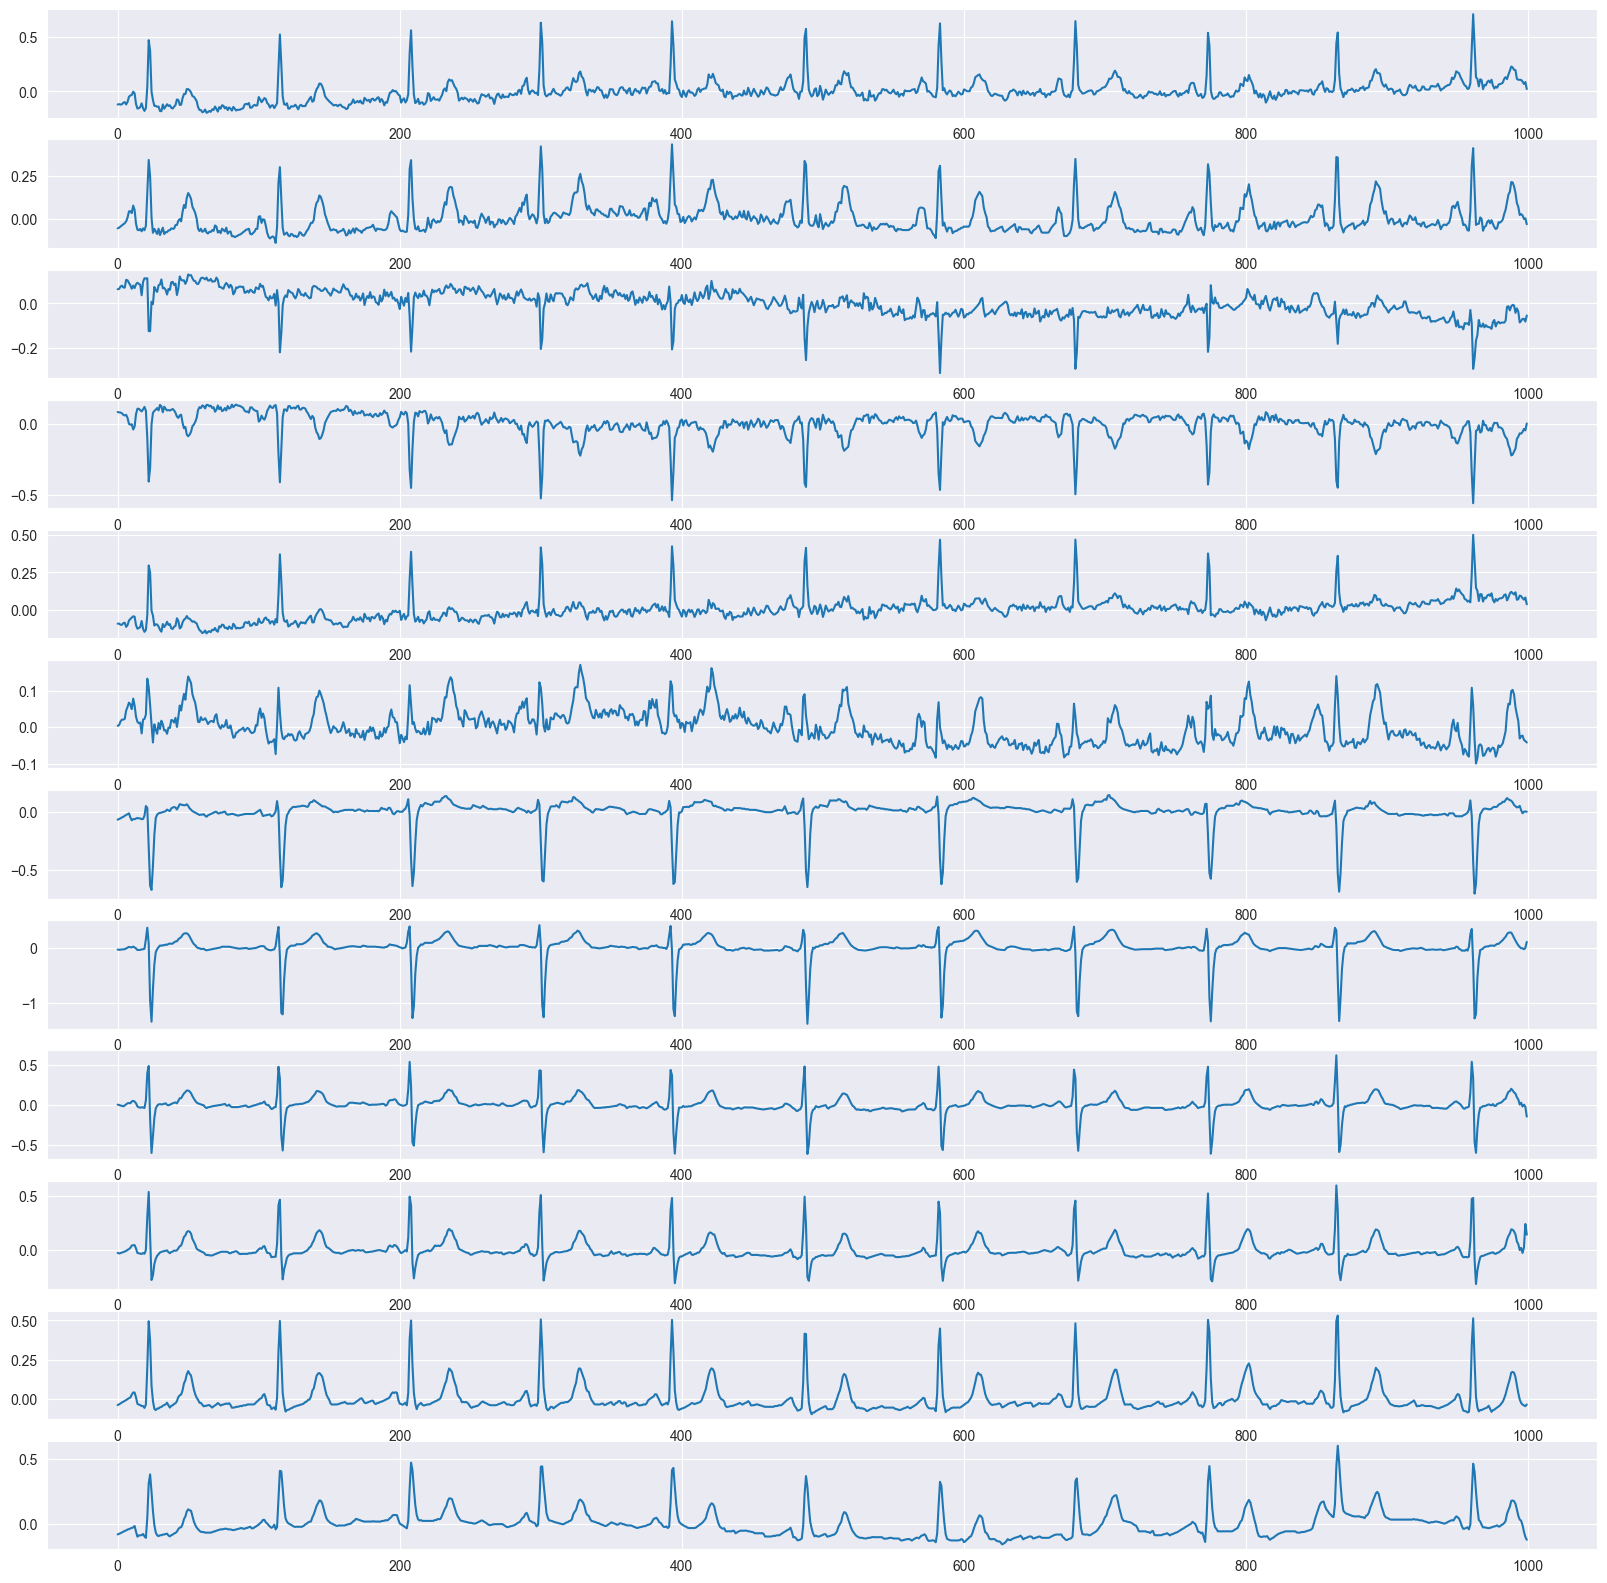

In [16]:
def print_ECGs(signals):
    bar, axes = plt.subplots(signals.shape[1], 1, figsize=(20,20))
    for i in range(signals.shape[1]):
        sns.lineplot(x=np.arange(signals.shape[0]), y=signals[:, i], ax=axes[i])
    #plt.tight_layout()
    plt.show()
print_ECGs(ECG_data[0])    

In [17]:

# pip install PyWavelets

In [18]:
import pywt

def denoise_signal(signal, wavelet='db4', level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    # Apply soft thresholding on detail coefficients
    thresholded_coeffs = [pywt.threshold(c, value=np.std(c)/2, mode='soft') if i > 0 else c for i, c in enumerate(coeffs)]
    return pywt.waverec(thresholded_coeffs, wavelet)
denoised_signal = denoise_signal(ECG_data)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [19]:
print(denoised_signal)

[[[-4.60620710e-02 -3.31504856e-02 -1.75319653e-02 ... -4.42813890e-02
   -4.50604524e-02 -4.58807704e-02]
  [-4.35152844e-02 -3.14288942e-02 -1.68044067e-02 ... -4.23919702e-02
   -4.31555630e-02 -4.39352088e-02]
  [-4.91493292e-02 -2.72780345e-02 -1.00977193e-02 ... -3.93810523e-02
   -4.01172119e-02 -4.08364411e-02]
  ...
  [-2.23302266e-03 -6.48791700e-03 -1.25417611e-02 ... -2.85001049e-02
   -2.95213918e-02 -3.04718163e-02]
  [ 1.68888196e-02 -2.52830966e-03 -1.55437711e-02 ...  8.76617783e-02
   -5.40811665e-02 -1.80491231e-02]
  [-1.62713642e-02 -1.89933993e-02 -2.11614930e-02 ...  2.65829347e-03
   -3.40156505e-02 -4.68821790e-02]]

 [[ 4.27308783e-02  6.47611268e-02  5.88715036e-02 ...  1.00723150e-01
    8.96555048e-02  1.00743805e-01]
  [ 1.81519950e-02  5.65457178e-02  5.53854118e-02 ...  7.32161217e-02
    7.19712907e-02  7.50034568e-02]
  [-1.93217442e-02  4.47247484e-02  5.00905279e-02 ...  3.61672312e-02
    3.65561400e-02  3.68940982e-02]
  ...
  [ 1.54072828e-01  2.7

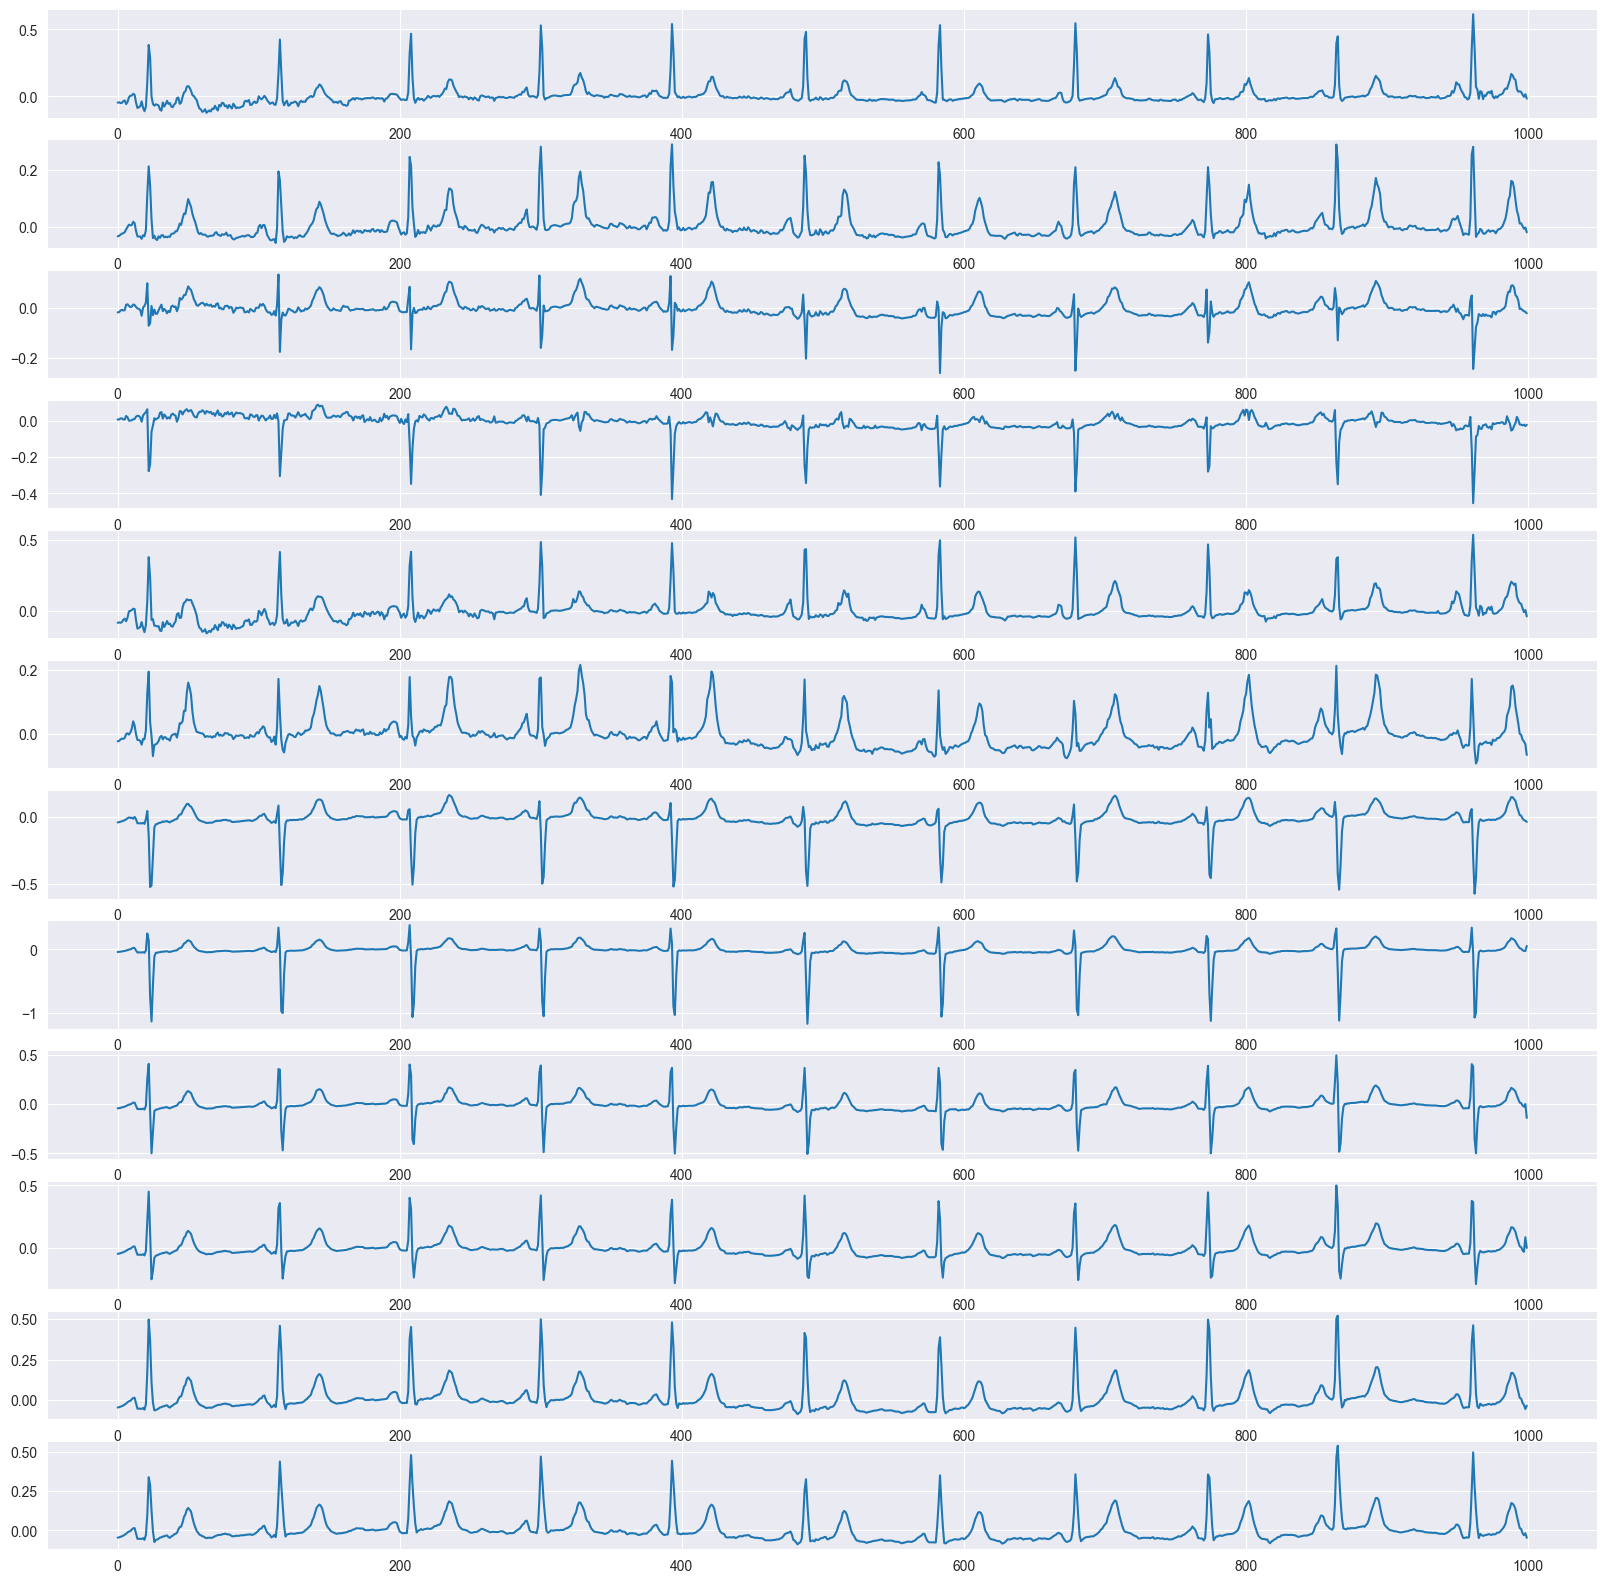

In [20]:
def print_ECGs(denoised_signal):
    bar, axes = plt.subplots(denoised_signal.shape[1], 1, figsize=(20,20))
    for i in range(denoised_signal.shape[1]):
        sns.lineplot(x=np.arange(denoised_signal.shape[0]), y=denoised_signal[:, i], ax=axes[i])
    #plt.tight_layout()
    plt.show()
print_ECGs(denoised_signal[0])   

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_19848\1285343168.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


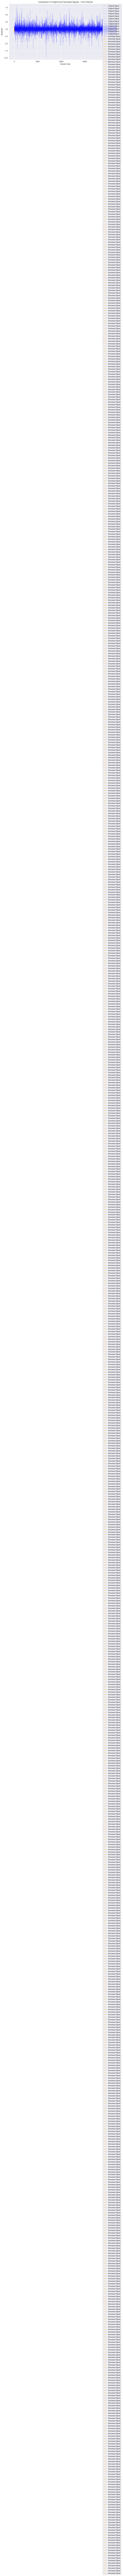

In [21]:
# Function to denoise signal (placeholder for actual implementation)
def denoise_signal(signal):
    # Example wavelet-based denoising (replace with actual implementation)
    coeffs = pywt.wavedec(signal, 'db4', level=4)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745 * np.sqrt(2 * np.log(len(signal)))
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(denoised_coeffs, 'db4')

# Denoise each signal separately
denoised_ECG = np.array([denoise_signal(ECG_data[:, i]) for i in range(ECG_data.shape[1])]).T

# Plot comparison for the first signal
plt.figure(figsize=(12, 6))

# Original and denoised signals on the same plot
plt.plot(np.arange(ECG_data.shape[0]), ECG_data[:, 0], label="Original Signal", alpha=0.2,color='blue')
plt.plot(np.arange(denoised_ECG.shape[0]), denoised_ECG[:, 0], label="Denoised Signal", alpha=0.7, color='orange')

# Customize the plot
plt.title("Comparison of Original and Denoised Signals - First Channel")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
1
# Show the plot
plt.tight_layout()
plt.show()


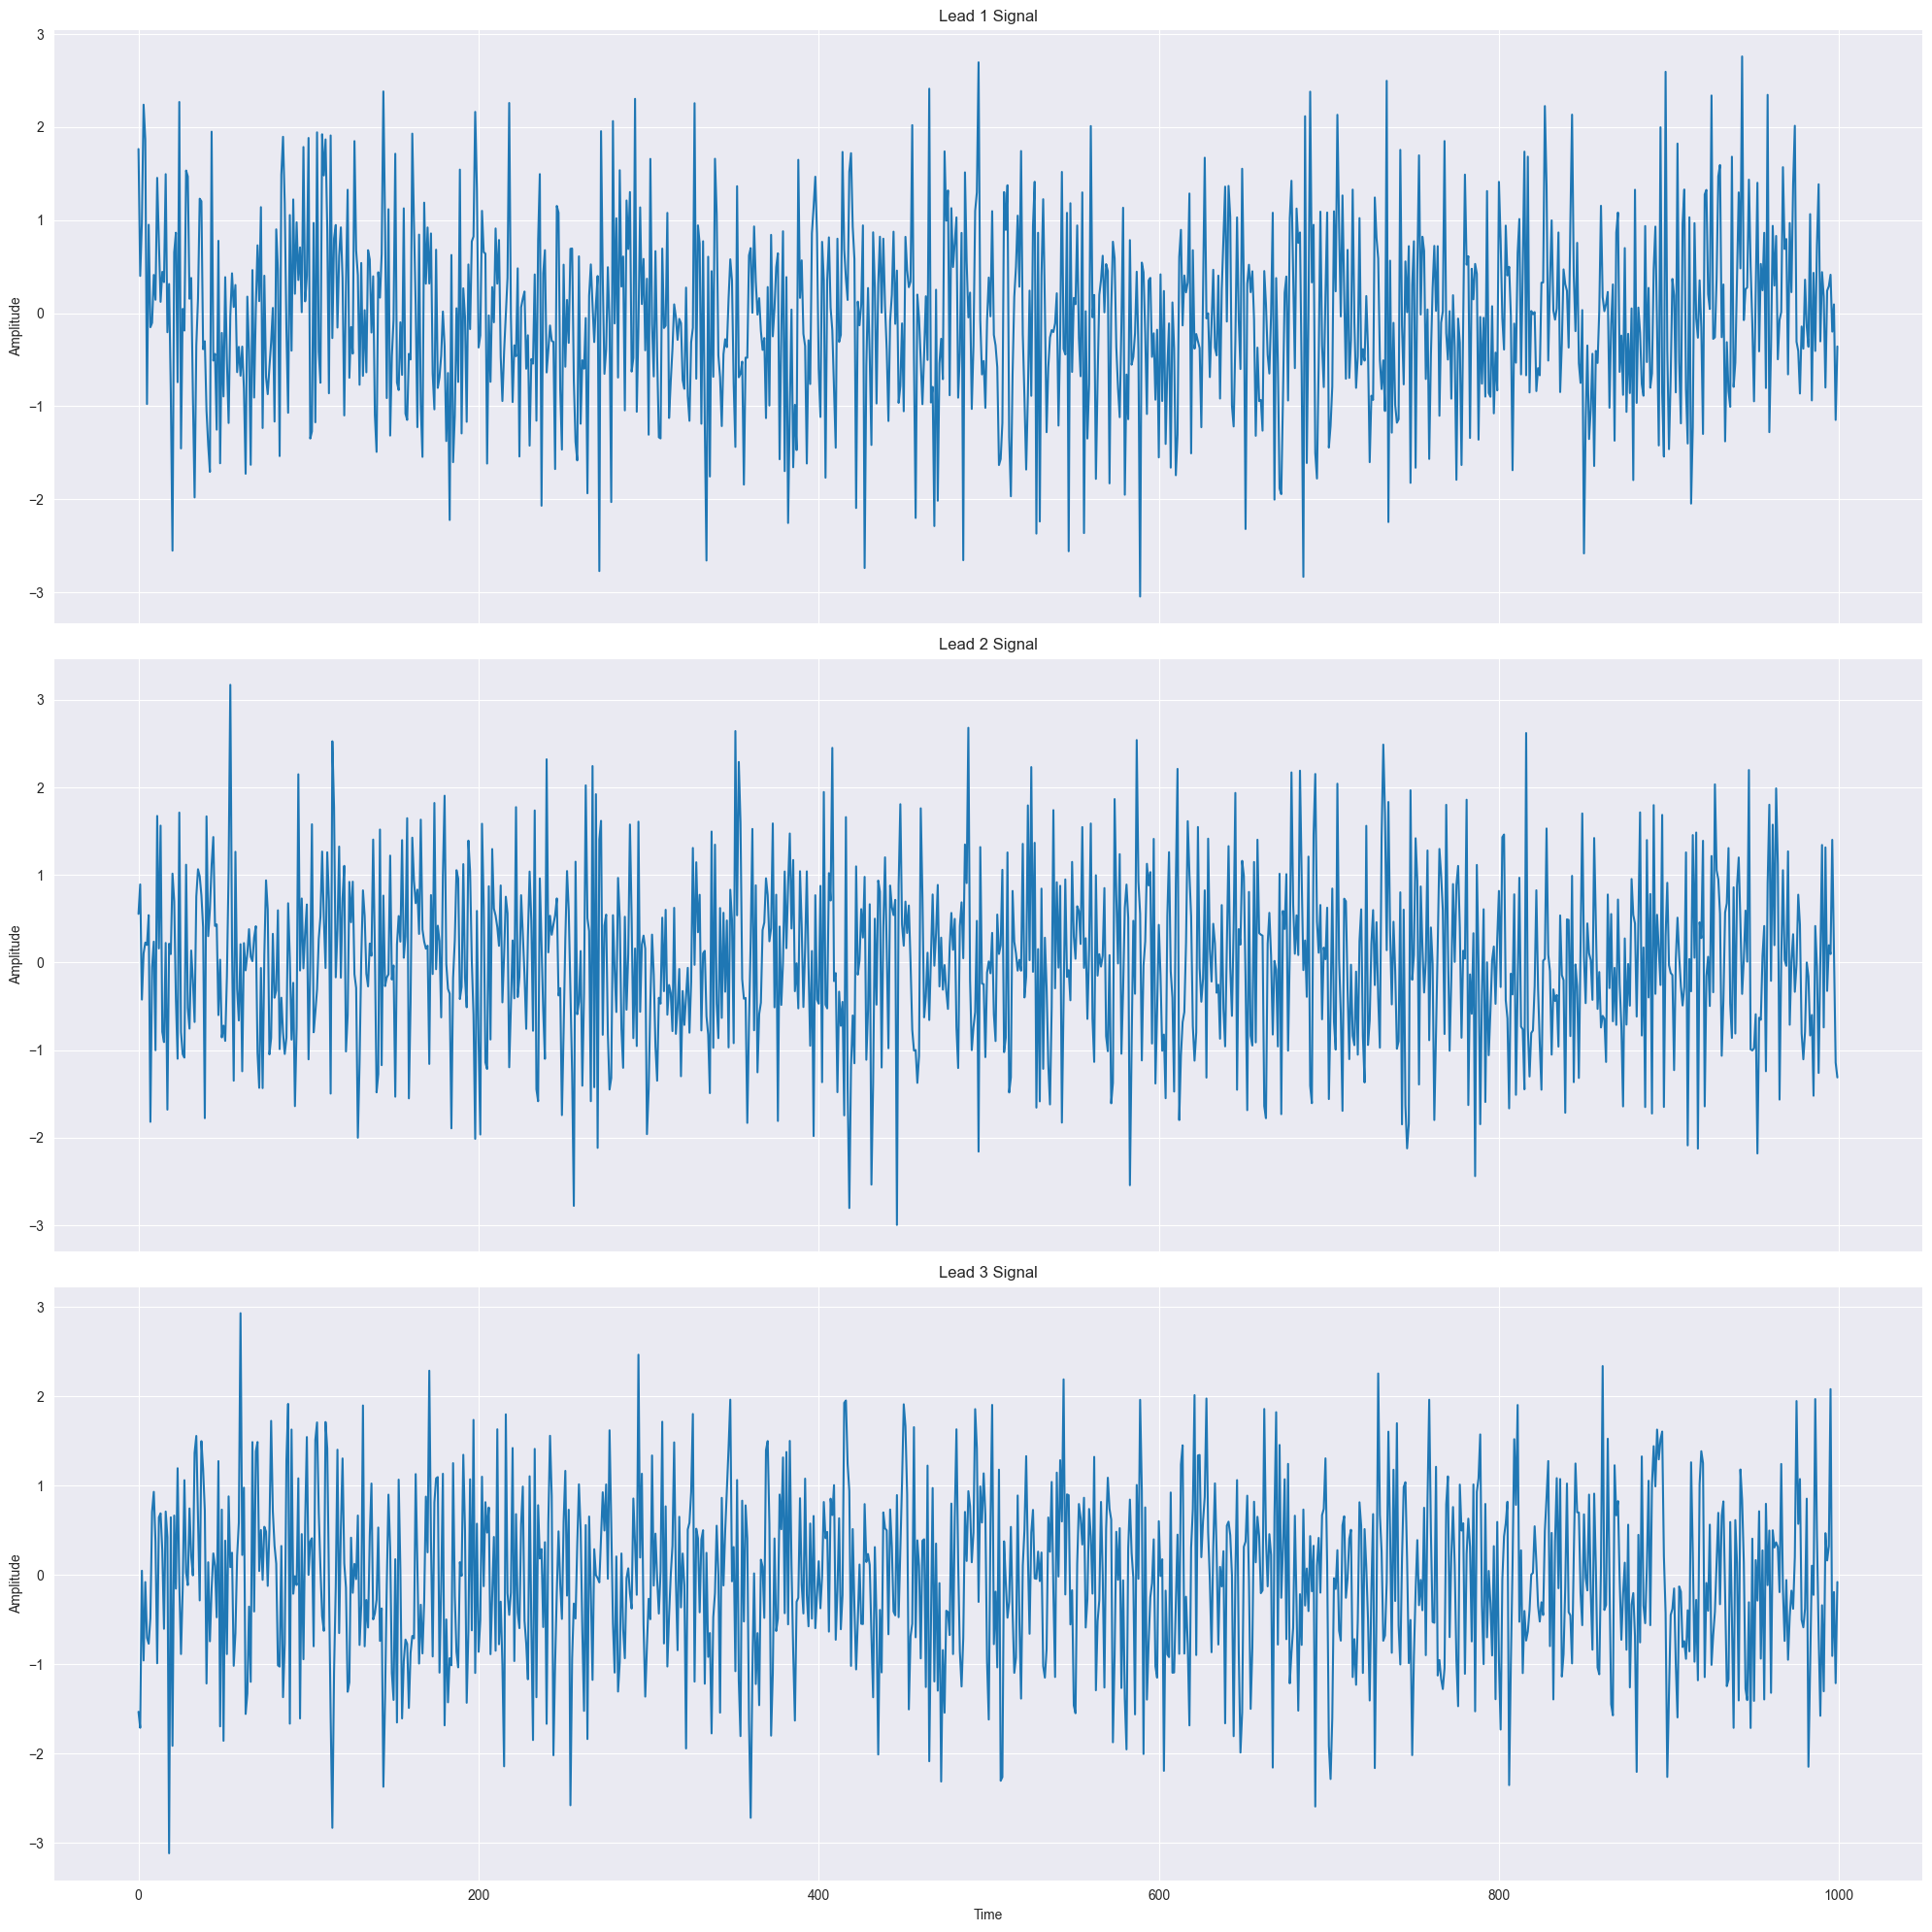

In [22]:
# Importing necessary libraries again due to state reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample ECG_data generation for demonstration
np.random.seed(0)  # For consistent random data
ECG_data = np.random.randn(1, 3, 1000)  # Example data: (5 ECGs, 3 leads, 1000 time points)

# Define the function to plot ECG signals
def print_ECGs(signals):
    fig, axes = plt.subplots(signals.shape[0], 1, figsize=(20, 20), sharex=True)
    for i in range(signals.shape[0]):
        sns.lineplot(x=np.arange(signals.shape[1]), y=signals[i], ax=axes[i])
        axes[i].set_title(f"Lead {i+1} Signal")
        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Plot the ECG signals for the first dataset
print_ECGs(ECG_data[0])



In [23]:
# def print_DENOISEECGs(signals):
#     fig, axes = plt.subplots(signals.shape[0], 1, figsize=(20, 20), sharex=True)
#     for i in range(signals.shape[0]):
#         sns.lineplot(x=np.arange(signals.shape[1]), y=signals[i], ax=axes[i])
#         axes[i].set_title(f"Lead {i+1} Signal")
#         axes[i].set_xlabel("Time")
#         axes[i].set_ylabel("Amplitude")
#     plt.tight_layout()
#     plt.show()
# # 
# # Plot the ECG signals for the first dataset
# print_DENOISEECGs(denoised_signal[0])

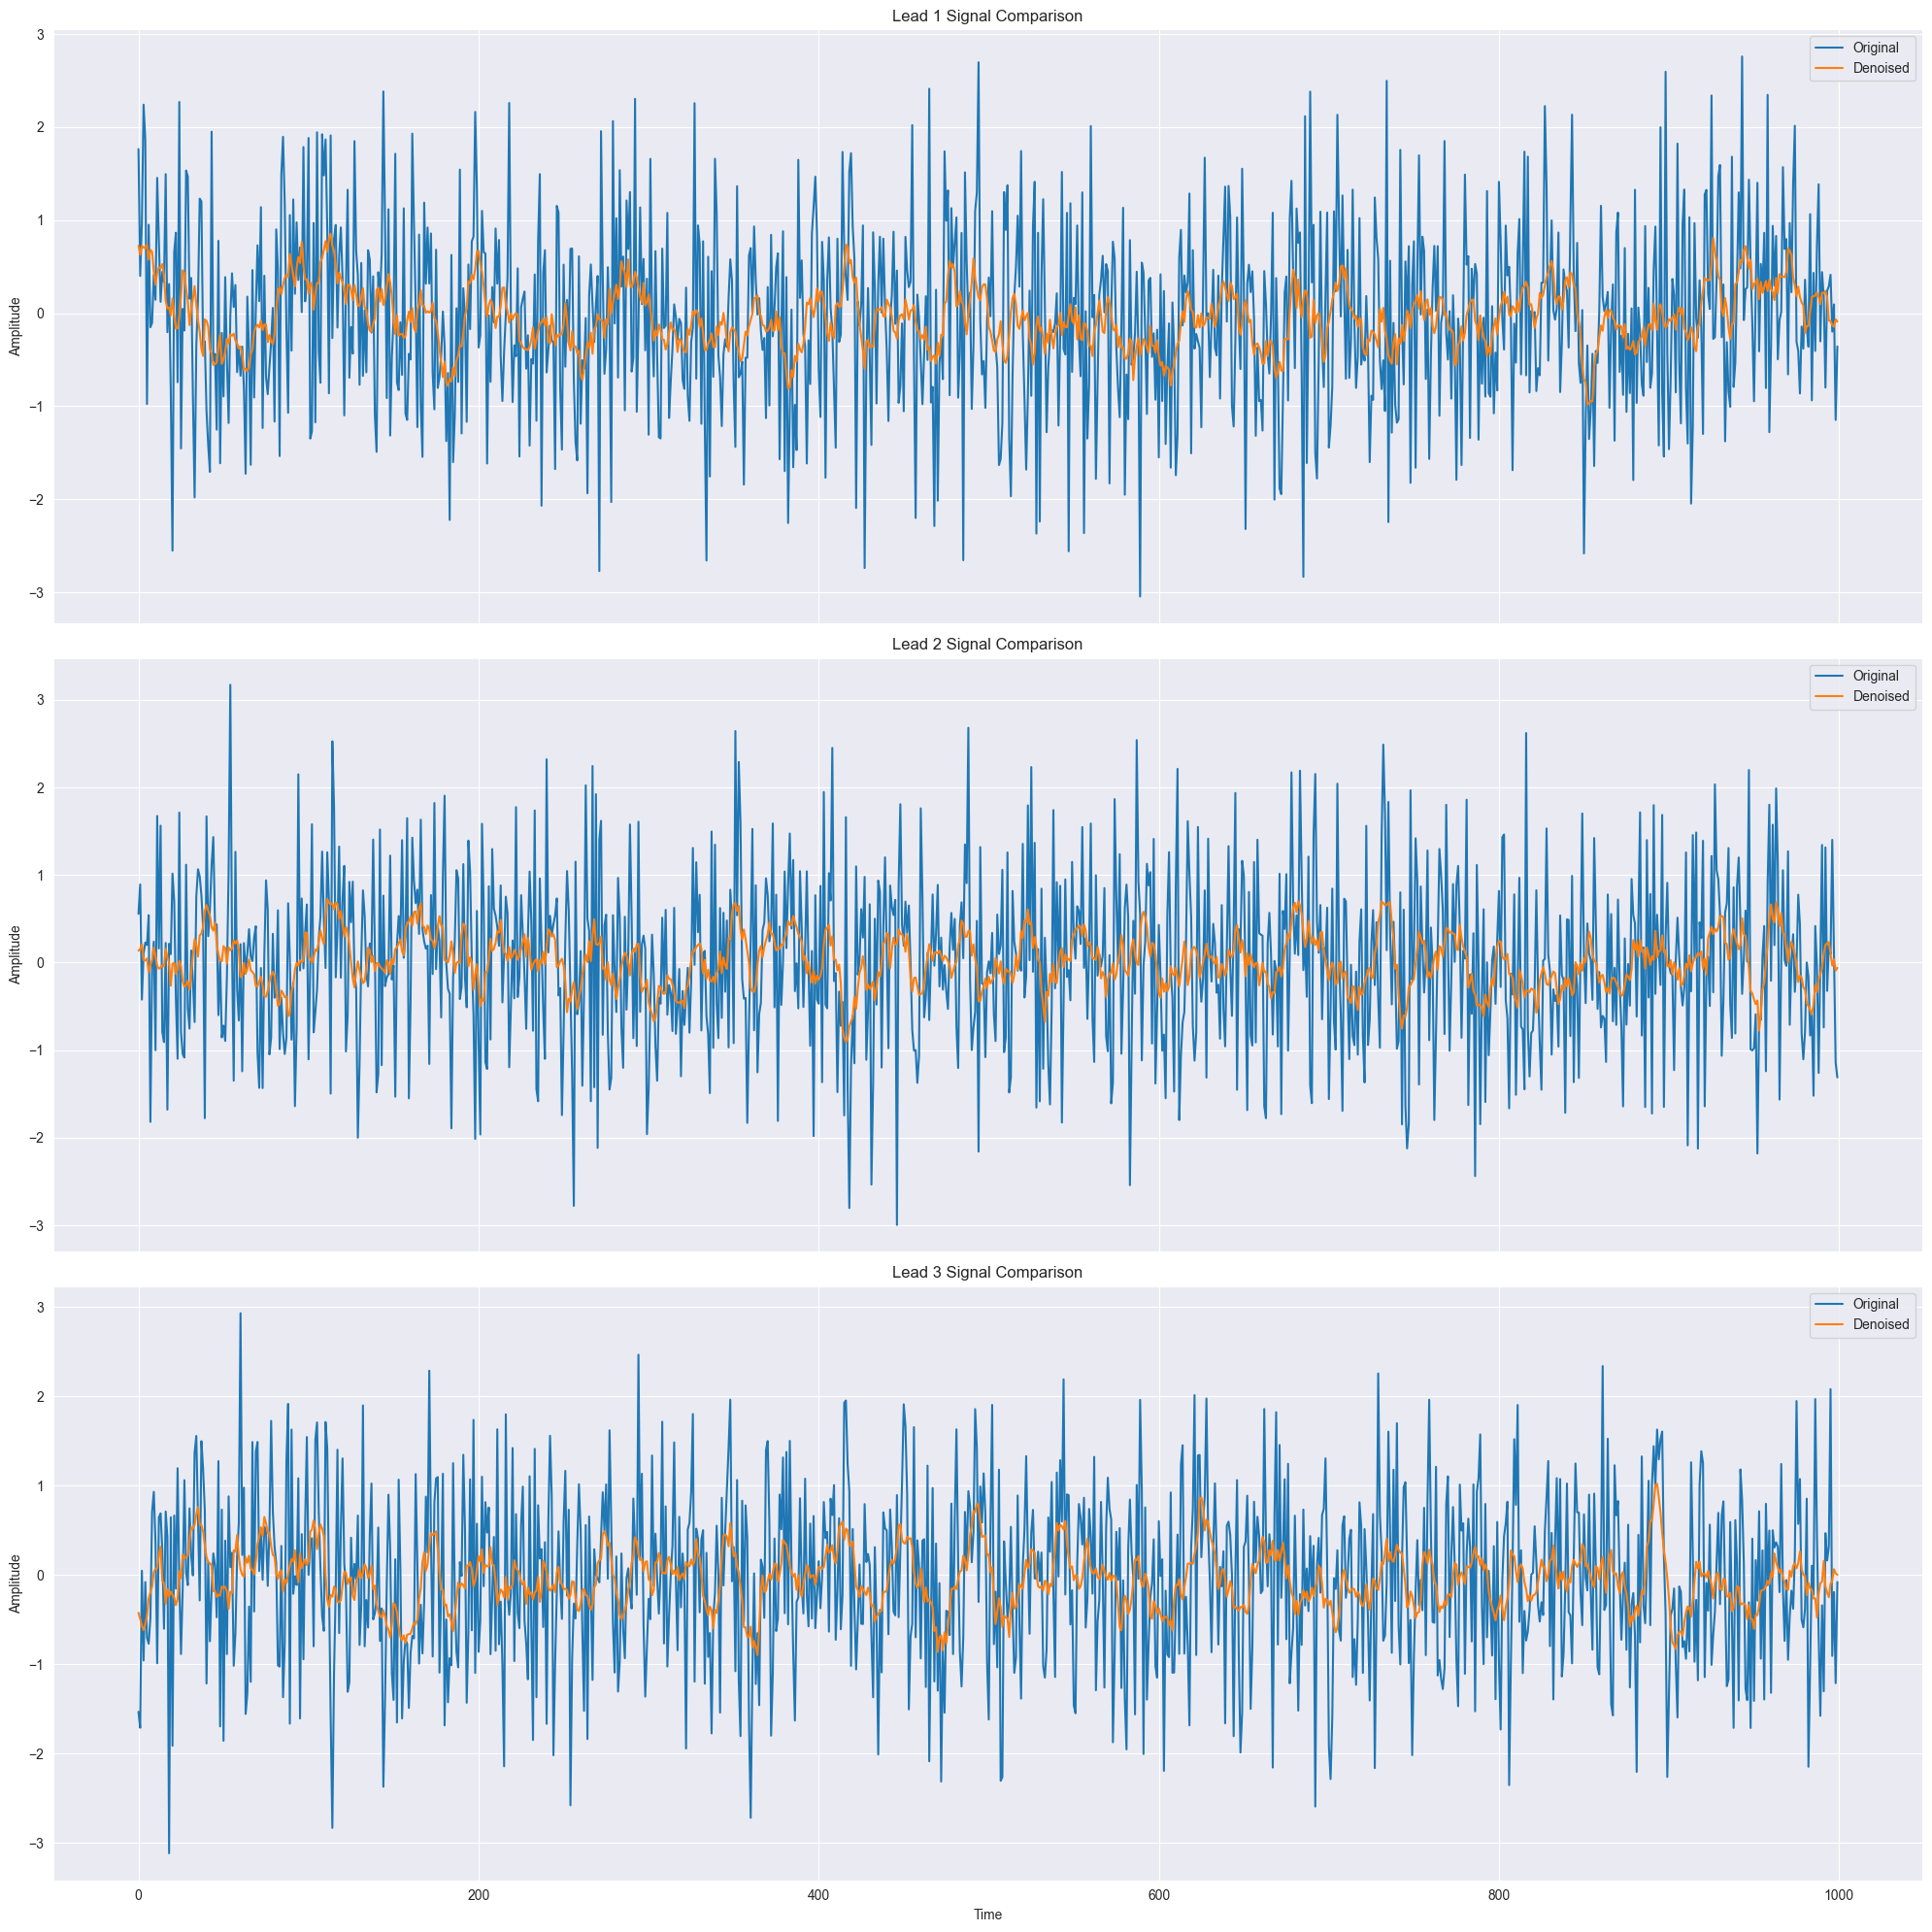

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample ECG_data generation for demonstration
np.random.seed(0)  # For consistent random data
ECG_data = np.random.randn(5, 3, 1000)  # Example data: (5 ECGs, 3 leads, 1000 time points)

# Generating a denoised version of the ECG signals (adding a simple low-pass filter effect for demonstration)
def low_pass_filter(signal, cutoff=0.1):
    return np.convolve(signal, np.ones(int(1/cutoff))/int(1/cutoff), mode='same')

denoised_signal = np.array([
    [low_pass_filter(ECG_data[i, j]) for j in range(ECG_data.shape[1])]
    for i in range(ECG_data.shape[0])
])

# Plotting function to overlay original and denoised ECGs
def plot_comparison(original, denoised):
    num_leads = original.shape[0]
    fig, axes = plt.subplots(num_leads, 1, figsize=(20, 20), sharex=True)
    time_points = np.arange(original.shape[1])

    for i in range(num_leads):
        sns.lineplot(x=time_points, y=original[i], ax=axes[i], label='Original')
        sns.lineplot(x=time_points, y=denoised[i], ax=axes[i], label='Denoised')
        axes[i].set_title(f"Lead {i + 1} Signal Comparison")
        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Amplitude")
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Plot the comparison for the first dataset (all leads)
plot_comparison(ECG_data[0], denoised_signal[0])


In [25]:
from scipy.signal import find_peaks, hilbert
from scipy.stats import entropy

In [26]:
# import numpy as np
# from scipy.signal import find_peaks

# def segment_signal(signal, sampling_rate=250):
   
#     # Detect R-peaks using a threshold-based method
#     threshold = np.mean(signal) + np.std(signal) * 0.8
#     min_distance = int(sampling_rate * 0.9)  # Minimum distance between peaks
#     peaks, _ = find_peaks(signal, height=threshold, distance=min_distance)
    
#     # Segment the signal between consecutive peaks
#     segments = []
#     for i in range(len(peaks) - 1):
#         start = peaks[i]
#         end = peaks[i + 1]
#         segments.append(signal[start:end])
    
#     return segments, peaks

# signal = denoised_signal[:, 0]

# # Flatten the signal if necessary
# if len(signal.shape) > 1:
#     signal = signal.flatten()

# # Segment the signal
# segments, r_peaks = segment_signal(signal)

# # Output results
# print("Detected R-peaks:", r_peaks)

# # segments
# from scipy.signal import find_peaks
# import numpy as np

# def segment_signal(signal, sampling_rate=250):
#     """
#     Segments an ECG signal based on detected R-peaks.
    
#     Parameters:
#     - signal: 1-D array of ECG data.
#     - sampling_rate: Sampling rate of the signal (default is 250 Hz).
    
#     Returns:
#     - segments: List of signal segments between detected peaks.
#     - peaks: Indices of detected R-peaks.
#     """
#     # Debug: Validate input signal
#     if len(signal.shape) != 1:
#         raise ValueError("Input signal must be a 1-D array.")
    
#     # Detect peaks
#     threshold = np.mean(signal) + np.std(signal) * 0.5
#     min_distance = int(sampling_rate * 0.6)  # Minimum distance between peaks
#     peaks, properties = find_peaks(signal, height=threshold, distance=min_distance)
    
#     # Debug: Check if peaks are detected
#     if len(peaks) == 0:
#         print("No peaks detected. Adjusting threshold and retrying.")
#         # Adjust the threshold and try again
#         threshold = np.mean(signal) + np.std(signal) * 0.2
#         peaks, properties = find_peaks(signal, height=threshold, distance=min_distance)
    
#     # Segment signal
#     segments = []
#     for i in range(len(peaks) - 1):
#         start = peaks[i]
#         end = peaks[i + 1]
#         segments.append(signal[start:end])
    
#     return segments, peaks

# # Example Usage
# # Assuming denoised_ECG is a valid 2-D array with rows as individual signals
# # denoised_ECG = np.random.randn(1000, 1)  # Replace with your denoised ECG data
# segments, r_peaks = segment_signal(denoised_ECG[:, 0])  # Use the first channel

# # Debug: Print results
# print("Detected R-peaks:", r_peaks)
# print("Number of segments:", len(segments))
# segments

In [27]:
import numpy as np
from scipy.signal import find_peaks

def segment_signal(signal, sampling_rate=250):
    """
    Segments an ECG signal based on R-peaks.

    Parameters:
        signal (1D array): The ECG signal to segment.
        sampling_rate (int): Sampling rate of the ECG signal in Hz.

    Returns:
        segments (list of arrays): List of segmented signal segments between R-peaks.
        r_peaks (1D array): Indices of the detected R-peaks.
    """
    if signal.ndim != 1:
        raise ValueError("Input signal must be a 1-D array.")

    # Detect R-peaks using find_peaks with a height threshold and minimum distance between peaks
    peaks, _ = find_peaks(
        signal, 
        height=np.mean(signal) + np.std(signal) * 0.5, 
        distance=int(sampling_rate * 0.6)  # Minimum distance between peaks (e.g., 600 ms for 60 BPM)
    )

    if len(peaks) < 2:
        raise ValueError("Insufficient R-peaks detected to segment the signal.")

    # Segment the signal between consecutive R-peaks
    segments = [signal[peaks[i]:peaks[i + 1]] for i in range(len(peaks) - 1)]

    return segments, peaks

# Example usage with a synthetic ECG signal
den_sample = np.random.randn(10000)  # Replace this with your denoised ECG signal
sampling_rate = 250  # Example sampling rate

# Segment the first lead of the ECG signal
segments, r_peaks = segment_signal(den_sample, sampling_rate=sampling_rate)

segments, r_peaks

([array([ 2.17787281e+00,  1.36792811e+00,  3.18472330e-01, -1.37537414e+00,
         -5.40871993e-01, -1.32422626e+00, -4.86250221e-02, -1.47431691e+00,
         -1.90597200e+00,  4.58501509e-01, -1.35630250e+00, -2.10270576e+00,
         -1.61602468e+00, -8.11184567e-01,  6.83317527e-01,  3.43151677e-01,
          1.06792108e+00,  3.96732584e-01,  1.37476234e+00, -1.92524103e+00,
         -1.56214344e+00,  3.56703397e-01,  1.60921933e-01, -4.59777440e-01,
         -1.51416794e+00,  2.33147863e-01, -1.26187522e+00, -7.51205753e-01,
         -1.01662302e+00, -5.06620510e-01,  1.91426413e+00,  1.30551770e+00,
         -3.58240539e-01,  3.41039879e-01,  7.15963391e-01, -9.02633080e-01,
          9.06170173e-01, -1.35937964e+00,  2.56447364e-01,  6.37150533e-01,
          4.50723851e-01,  2.05585344e+00,  4.67450080e-01,  4.00892101e-01,
          1.14212831e+00, -7.80556062e-01,  8.75466316e-01,  1.10914713e+00,
         -4.74043285e-01, -1.04710918e+00,  5.69688708e-01,  1.46109120e+00,

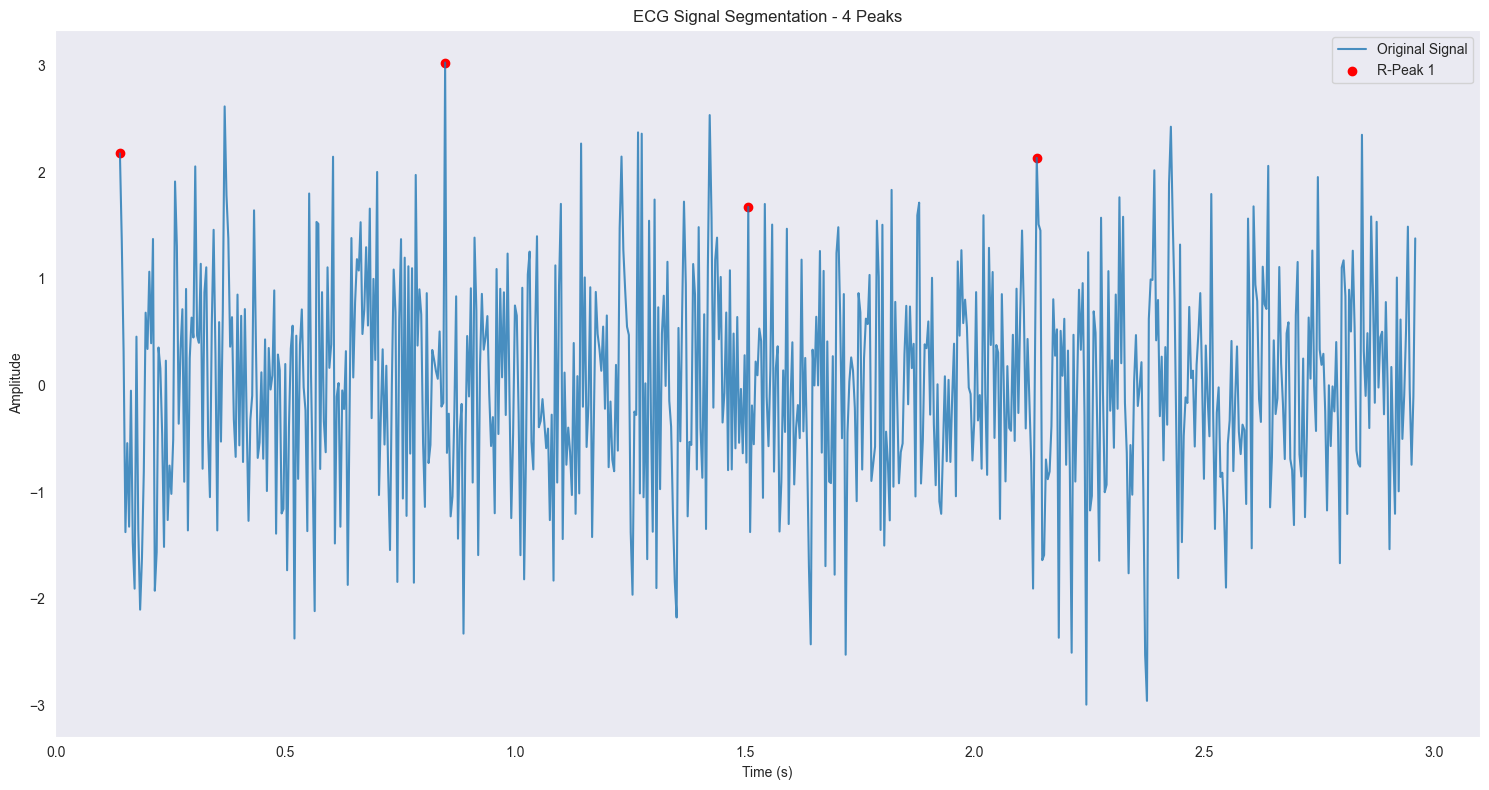

In [28]:
# Adjusting the plot to focus on a time window that includes 3-4 peaks

def plot_time_window_segments(segments, r_peaks, signal, sampling_rate=250, num_peaks=4):
  
    if num_peaks > len(r_peaks) - 1:
        raise ValueError("Number of peaks to display exceeds the available number of R-peaks.")

    # Focus on the time window around the first 'num_peaks' peaks
    start_idx = r_peaks[0]
    end_idx = r_peaks[num_peaks]
    time = np.arange(len(signal)) / sampling_rate  # Time axis in seconds

    plt.figure(figsize=(15, 8))

    # Plot the original signal for the selected time window
    plt.plot(time[start_idx:end_idx], signal[start_idx:end_idx], label="Original Signal", alpha=0.8)

    # Overlay the selected peaks and segments
    for i in range(num_peaks):
        peak_idx = r_peaks[i]
        next_peak_idx = r_peaks[i + 1]
        plt.scatter(peak_idx / sampling_rate, signal[peak_idx], color='red', label=f'R-Peak {i + 1}' if i == 0 else None)
        # segment_time = time[peak_idx:next_peak_idx]
        # plt.plot(segment_time, segments[i], label=f'Segment {i + 1}',  alpha=0.7)

    plt.title(f"ECG Signal Segmentation - {num_peaks} Peaks")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Plot only a time window that includes the first 3-4 peaks/segments
plot_time_window_segments(segments, r_peaks, den_sample, sampling_rate=sampling_rate, num_peaks=4)


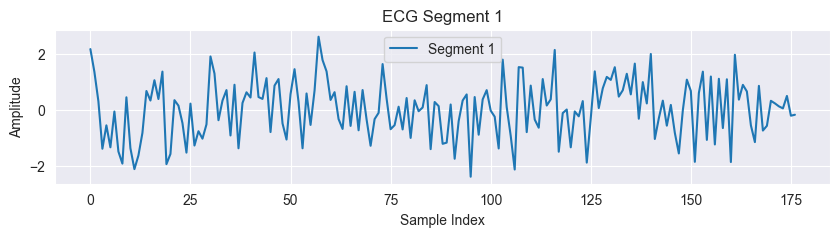

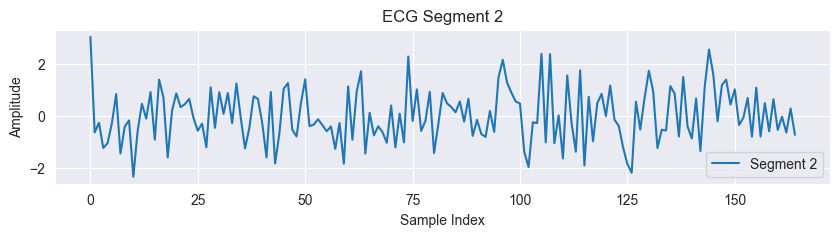

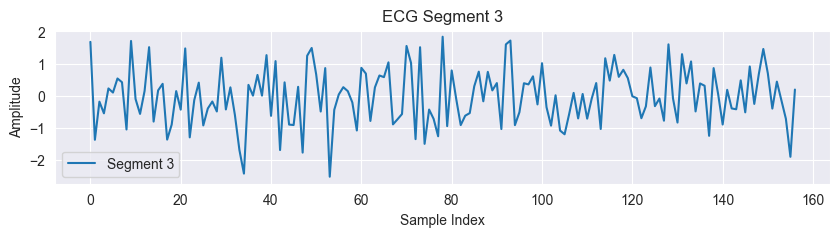

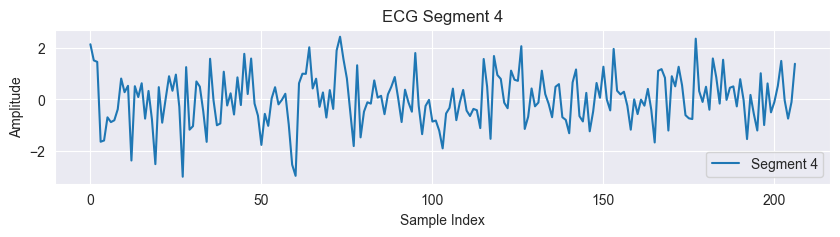

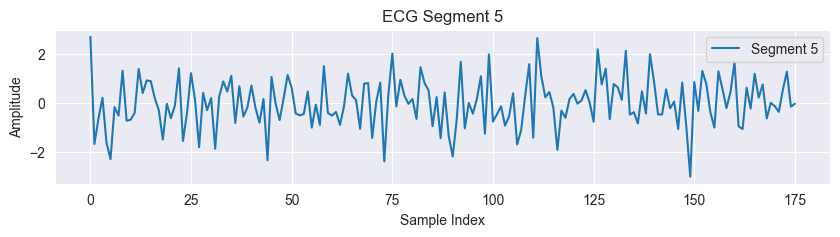

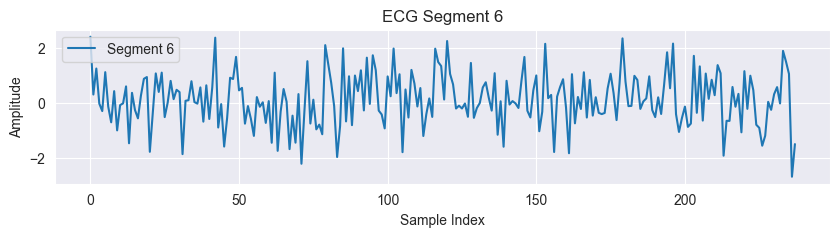

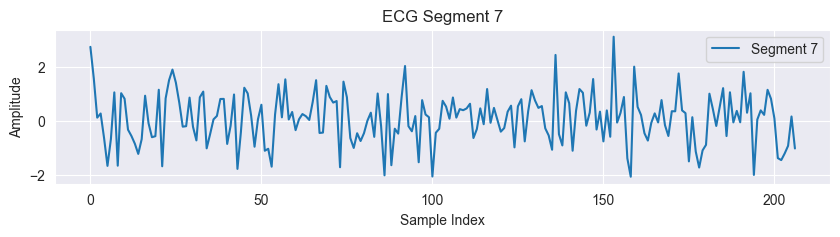

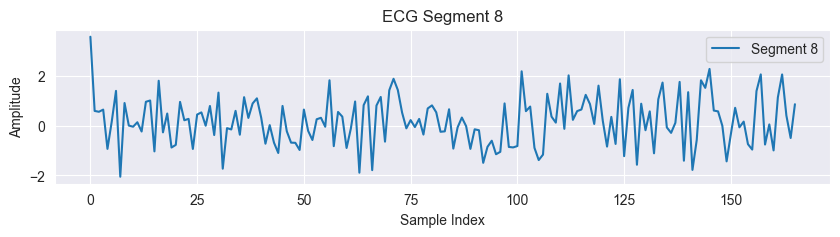

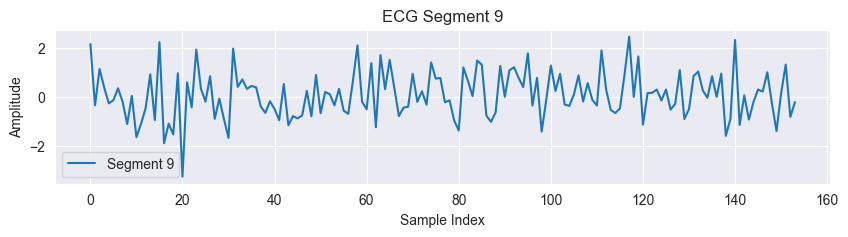

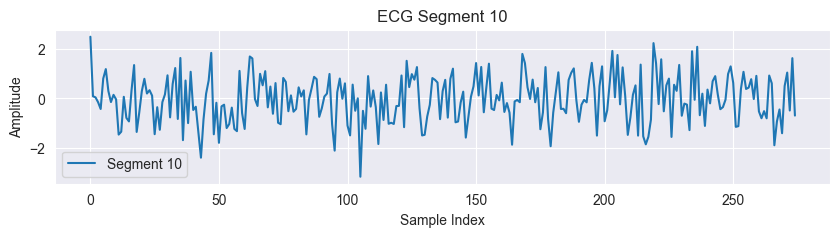

In [29]:
# Plot Individual Segments
for idx, segment in enumerate(segments[:10]):  # Plot the first 10 segments
    plt.figure(figsize=(10, 2))
    plt.plot(segment, label=f"Segment {idx + 1}")
    plt.title(f"ECG Segment {idx + 1}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

In [30]:
import numpy as np
from scipy.signal import hilbert

def extract_features(segment, fs):
    """
    Extract ECG features: QRS duration, T-wave inversion, and ST elevation.

    Parameters:
        segment (array): ECG signal segment.
        fs (int): Sampling frequency in Hz.

    Returns:
        dict: Extracted features.
    """
    # QRS duration calculation
    qrs_threshold = 0.7 * np.max(np.abs(segment))  # Example threshold for R-peaks
    qrs_indices = np.where(np.abs(segment) > qrs_threshold)[0]
    if len(qrs_indices) > 0:
        qrs_duration = (qrs_indices[-1] - qrs_indices[0]) / fs * 1000  # in milliseconds
    else:
        qrs_duration = 0  # Default to 0 if no QRS complex is detected

    # T-wave inversion detection
    t_wave_inversion = np.any(segment < 0)  # Example check for negative deflection

    # ST elevation detection
    st_baseline = np.mean(segment[:int(0.2 * len(segment))])  # First 20% as baseline
    st_elevation = np.mean(segment[int(0.8 * len(segment)):]) - st_baseline  # Last 20% for ST segment
    
    return {
        'qrs_duration': qrs_duration,
        't_wave_inversion': t_wave_inversion,
        'st_elevation': st_elevation,
    }

# Example Usage
features = []
fs = 250  # Example sampling frequency in Hz
for segment in segments:
    features.append(extract_features(segment, fs))
    
print(features)


[{'qrs_duration': np.float64(644.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(0.2375039862869065)}, {'qrs_duration': np.float64(576.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(0.20996700504067173)}, {'qrs_duration': np.float64(484.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(0.08213058071956311)}, {'qrs_duration': np.float64(708.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(0.3782255693738156)}, {'qrs_duration': np.float64(596.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(0.18181114423408212)}, {'qrs_duration': np.float64(944.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(-0.0393714433195749)}, {'qrs_duration': np.float64(612.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(-0.16557511177664633)}, {'qrs_duration': np.float64(0.0), 't_wave_inversion': np.True_, 'st_elevation': np.float64(0.08758827113353104)}, {'qrs_duration': np.float64(480.0), 't_wave_inversion': np.True_, 'st_elev

In [31]:
import pandas as pd
features_df = pd.DataFrame(features)
features_df.columns 


Index(['qrs_duration', 't_wave_inversion', 'st_elevation'], dtype='object')

In [32]:
features_df

qrs_duration  t_wave_inversion  st_elevation
0          644.0              True      0.237504
1          576.0              True      0.209967
2          484.0              True      0.082131
3          708.0              True      0.378226
4          596.0              True      0.181811
5          944.0              True     -0.039371
6          612.0              True     -0.165575
7            0.0              True      0.087588
8          480.0              True      0.190828
9          876.0              True      0.267978
10         344.0              True     -0.221116
11         708.0              True     -0.197952
12         880.0              True      0.138255
13        1044.0              True      0.028300
14         540.0              True      0.129340
15         412.0              True     -0.107343
16        1124.0              True      0.133086
17         560.0              True     -0.194127
18         316.0              True     -0.220740
19         912.0              True      0.137709
20         480.0              True     -0.017565
21         812.0              True     -0.290485
22         656.0              True     -0.256282
23        1052.0              True      0.079158
24         560.0              True     -0.072026
25         216.0              True      0.051193
26         708.0              True     -0.059456
27         596.0              True      0.188357
28         732.0              True     -0.170476
29         696.0              True     -0.147829
30         676.0              True     -0.211252
31         892.0              True      0.032398
32         740.0              True      0.132836
33         540.0              True     -0.347838
34         992.0              True      0.025128
35         508.0              True     -0.439986
36         656.0              True      0.011549
37           0.0              True     -0.404781
38         956.0              True      0.240703
39         360.0              True     -0.150952
40         472.0              True     -0.211312
41          44.0              True      0.333837
42         844.0              True     -0.343263
43         840.0              True     -0.036192
44         640.0              True     -0.027035
45         488.0              True      0.059273
46        1016.0              True     -0.391189
47         696.0              True     -0.154271
48         164.0              True     -0.126988

In [33]:
ECG_df.isna().sum(axis = 0)

patient_id                          0
age                                89
sex                                 0
height                          14854
weight                          12408
nurse                            1509
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8505
infarction_stadium1             16211
infarction_stadium2             21734
validated_by                     9411
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20230
static_noise                    18575
burst_noise                     21224
electrodes_problems             21807
extra_beats                     19883
pacemaker                       21544
strat_fold                          0
filename_lr                         0
filename_hr 

In [34]:
ECG_df.shape

(21837, 29)

In [35]:
ECG_df[[col for col in ECG_df.columns if col not in ('scp_codes', 'scp_classes','scp_subclasses')]].nunique(dropna=True)

patient_id                      18885
age                                94
sex                                 2
height                             77
weight                            127
nurse                              12
site                               51
device                             11
recording_date                  21813
report                           9883
heart_axis                          8
infarction_stadium1                 6
infarction_stadium2                 3
validated_by                       12
second_opinion                      2
initial_autogenerated_report        2
validated_by_human                  2
baseline_drift                    321
static_noise                      124
burst_noise                       103
electrodes_problems                14
extra_beats                       128
pacemaker                           4
strat_fold                         10
filename_lr                     21837
filename_hr                     21837
dtype: int64

In [36]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    if pct > 5 : return f"{pct:.1f}%\n({absolute:d})"
    else: return None

def print_pie(df, column,names = None, legend = True):
    data = df[column].value_counts()
    if names == None: names = df[column].unique()
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
    if legend:
        ax.legend(wedges, names,
                  title="",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(column + " distribution")
    plt.show()

def print_hist(df, column, title = None):
    plt.figure(figsize = (20,7))
    plt.hist(df[column], bins = 70)
    if title == None: title = column
    plt.title('histogram of ' + title)

In [37]:
all_classes = []
for i in range(ECG_df.shape[0]):
    t = ECG_df.scp_classes.iloc[i]
    for j in range(len(t)):
        all_classes.append(t[j])
all_subclasses = []
for i in range(ECG_df.shape[0]):
    t = ECG_df.scp_subclasses.iloc[i]
    for j in range(len(t)):
        all_subclasses.append(t[j])

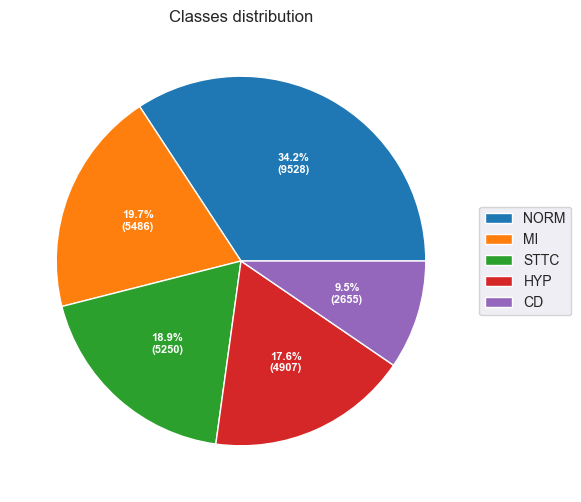

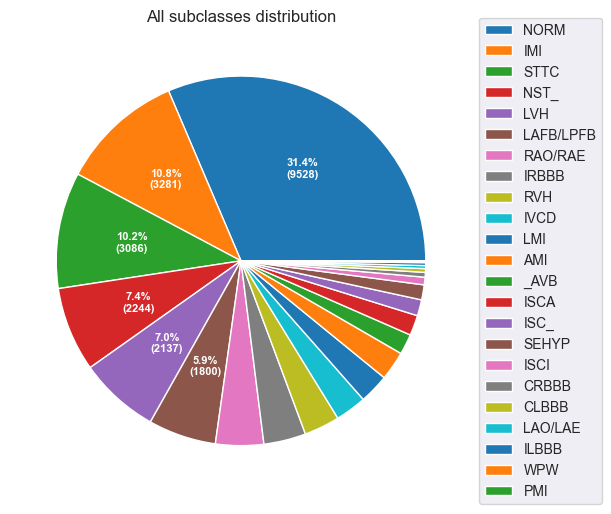

In [38]:
print_pie(pd.DataFrame({'Classes': all_classes}), 'Classes')
print_pie(pd.DataFrame({'All subclasses': all_subclasses}), 'All subclasses')

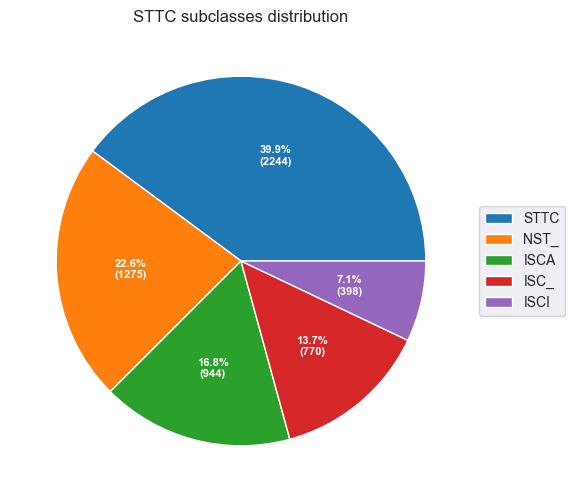

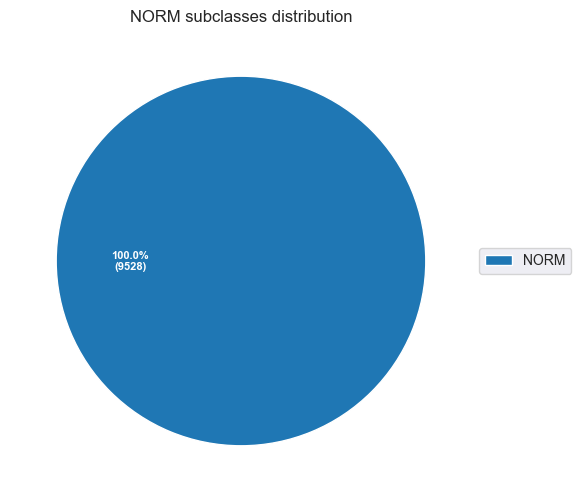

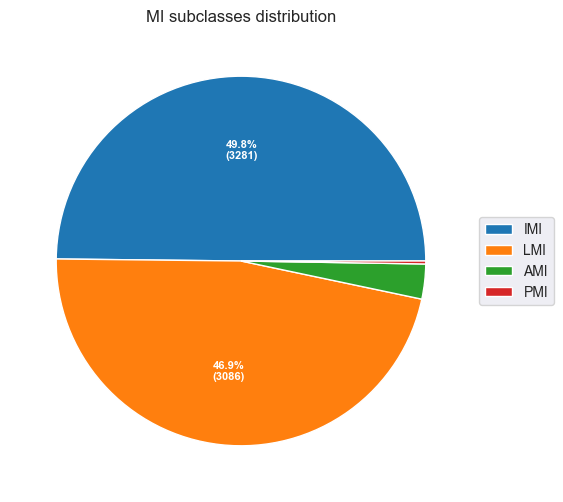

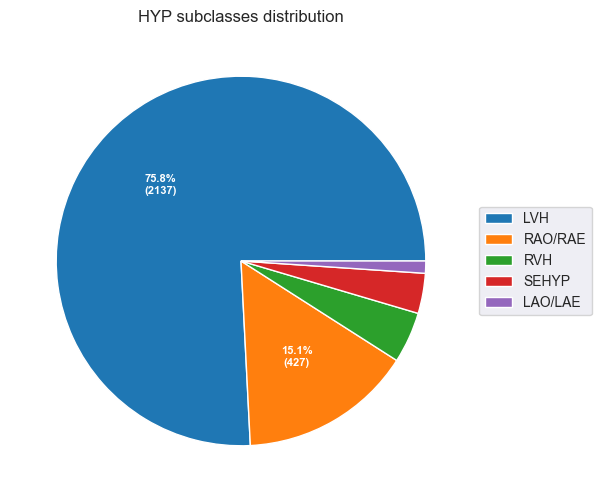

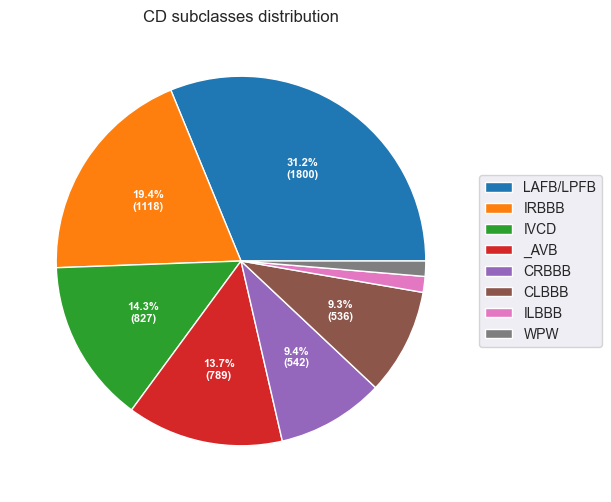

In [39]:
for cl in SCP_df.diagnostic_class.unique():
    subclasses_list = SCP_df.groupby('diagnostic_class').get_group(cl).diagnostic_subclass.values
    subcl_of_cl = [subcl for subcl in all_subclasses if subcl in subclasses_list]
    print_pie(pd.DataFrame({cl + ' subclasses': subcl_of_cl}), cl + ' subclasses')

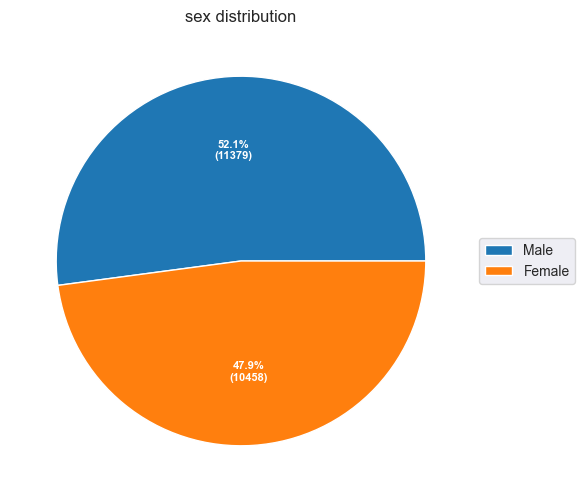

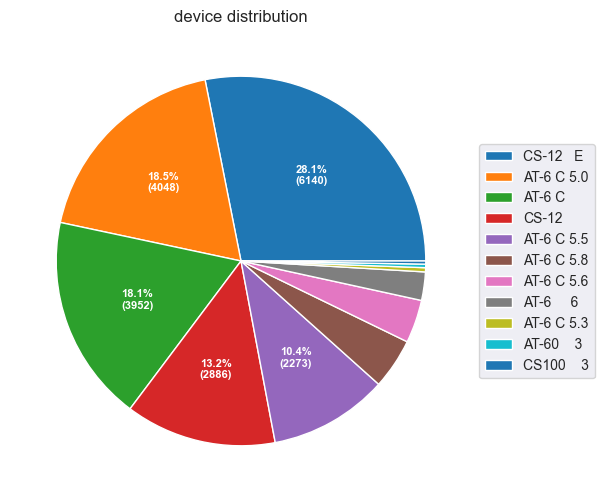

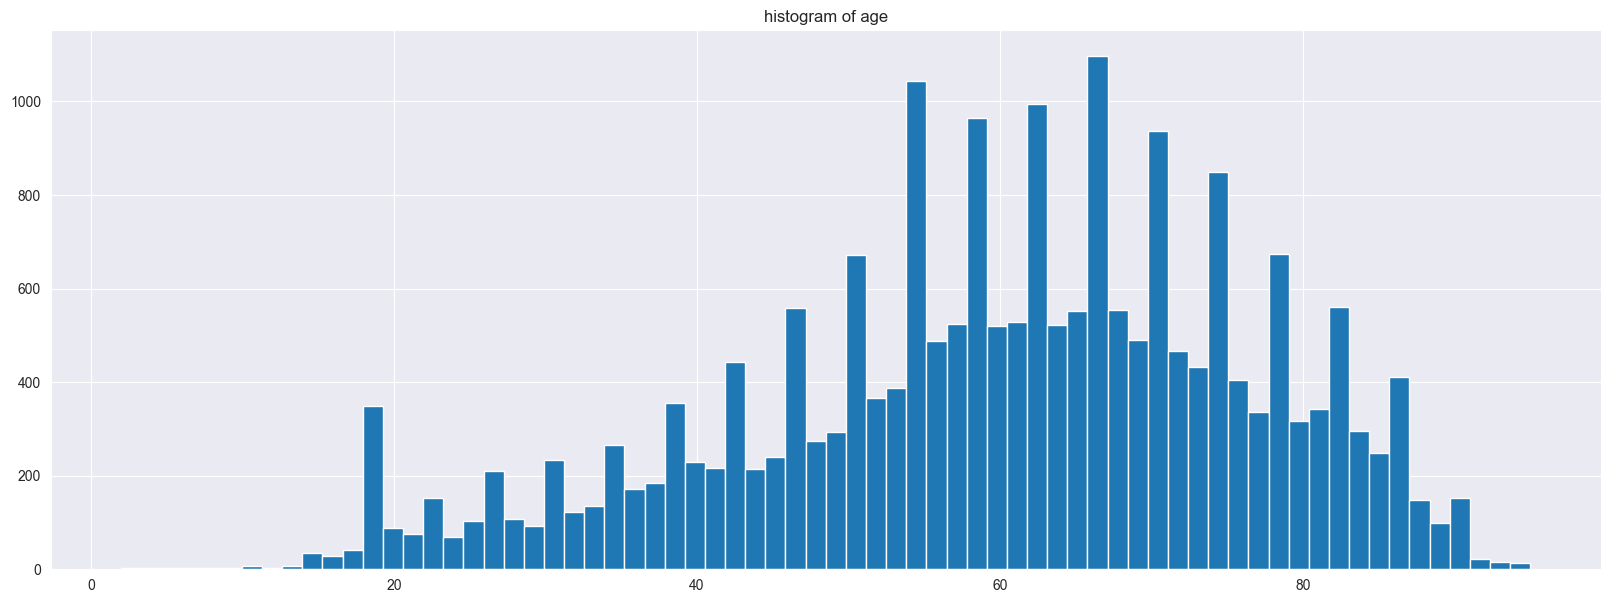

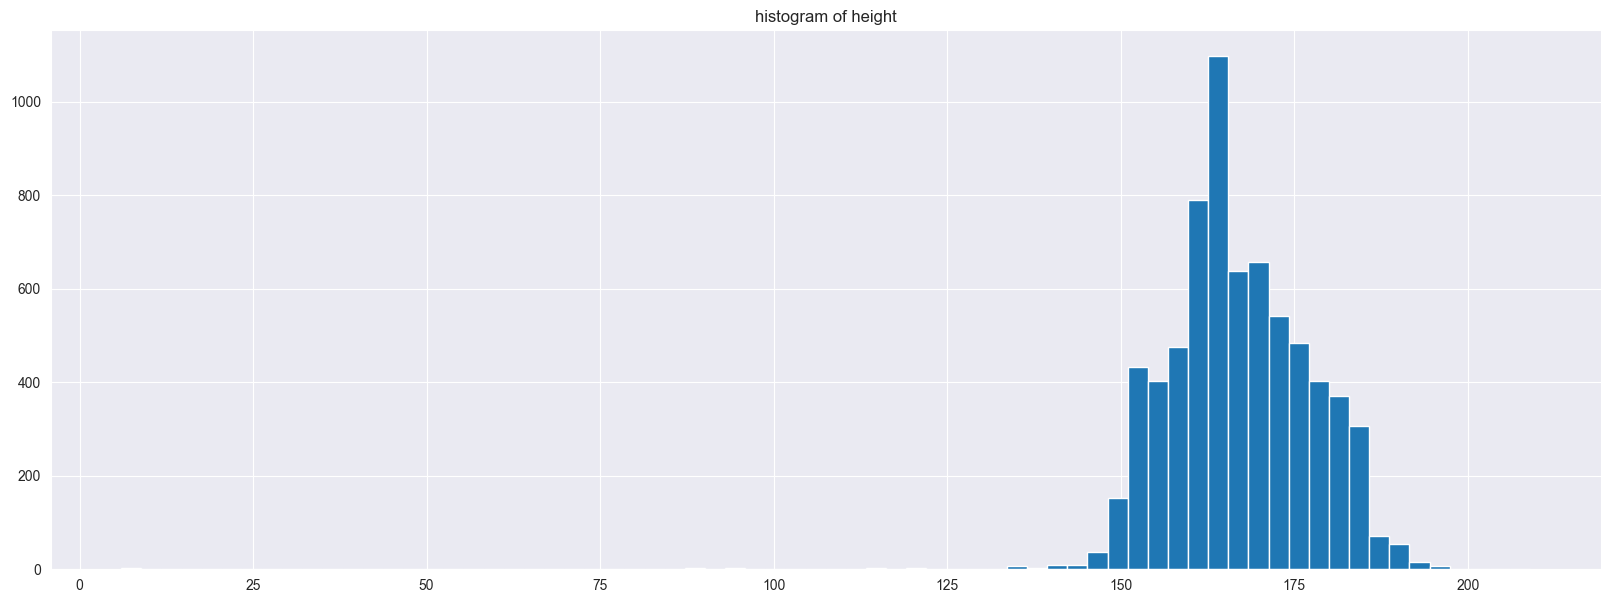

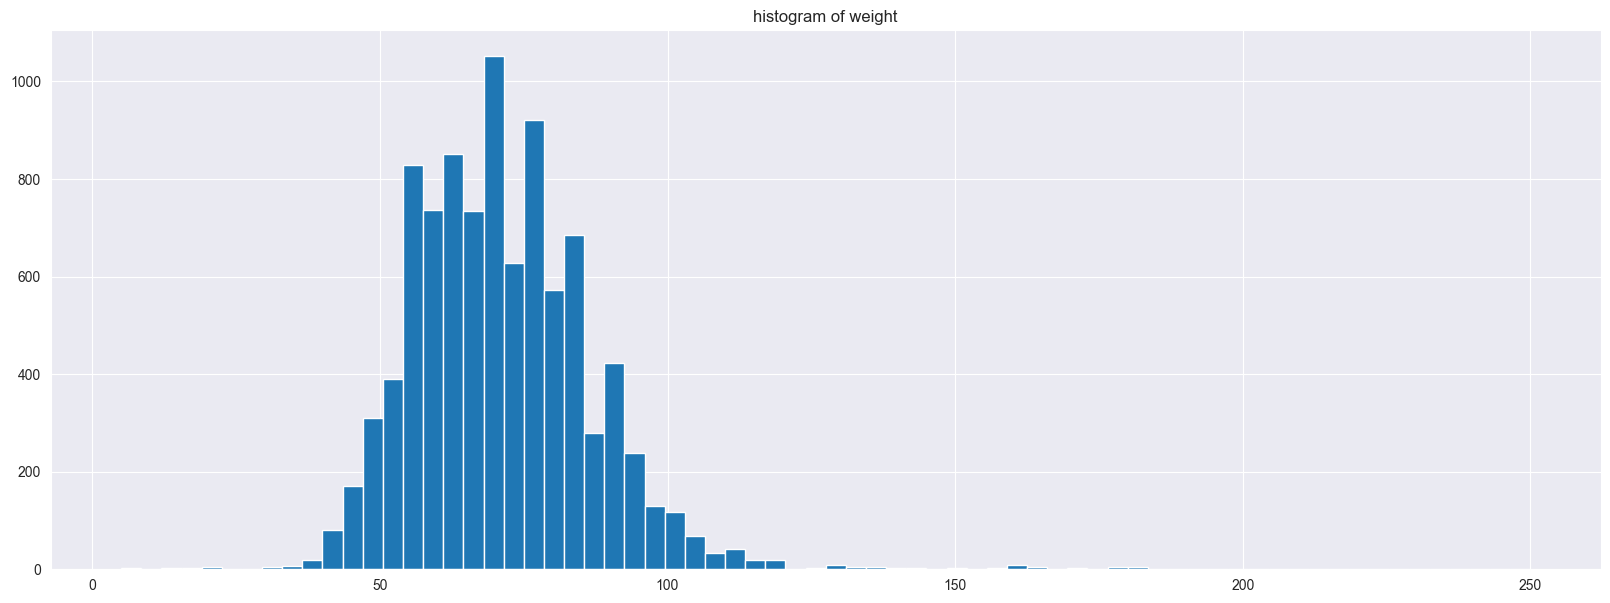

In [40]:
print_pie(ECG_df, 'sex', ['Male', 'Female'])
print_pie(ECG_df, 'device')

print_hist(ECG_df, 'age')
print_hist(ECG_df, 'height')
print_hist(ECG_df, 'weight')

In [41]:
ECG_df['MI_class'] = ECG_df.scp_classes.apply(lambda x: 'MI' in x)

In [42]:
ECG_df['MI_class'].unique()

array([False,  True])

In [43]:
ECG_df.sample(2)

patient_id   age  sex  height  weight  nurse  site      device  \
ecg_id                                                                   
5614         20168  52.0    0     NaN     NaN      0     0  CS100    3   
14535         3148   NaN    1   160.0    48.0      8     1  AT-6 C 5.5   

             recording_date  \
ecg_id                        
5614    1991-01-09 09:55:46   
14535   1995-07-23 12:28:39   

                                                                                                                                                                                                                                                                 report  \
ecg_id                                                                                                                                                                                                                                                                    
5614                                                                                                                                   sinusrhythmus linkstyp qrs(t) abnorm    inferiorer infarkt     alter unbest. 4.46                          unbestÄtigter bericht   
14535   atrial fibrillation with rapid ventricular response. voltages are high in chest leads suggesting lvh. probable old anteroseptal myocardial infarction. st segments are depressed in i, ii, avl, avf, v4,5,6. t waves are slightly inverted in these leads. this   

                                                                                  scp_codes  \
ecg_id                                                                                        
5614                                                 {'IMI': 50.0, 'ABQRS': 0.0, 'SR': 0.0}   
14535   {'ASMI': 50.0, 'LVH': 100.0, 'ISC_': 100.0, 'VCLVH': 0.0, 'STD_': 0.0, 'AFIB': 0.0}   

       heart_axis infarction_stadium1 infarction_stadium2  validated_by  \
ecg_id                                                                    
5614          LAD             unknown                 NaN          <NA>   
14535         NaN         Stadium III                 NaN             0   

        second_opinion  initial_autogenerated_report  validated_by_human  \
ecg_id                                                                     
5614             False                          True               False   
14535            False                         False                True   

       baseline_drift static_noise burst_noise electrodes_problems  \
ecg_id                                                               
5614              NaN          NaN         NaN                 NaN   
14535             NaN          NaN        v4,6                 NaN   

       extra_beats pacemaker  strat_fold                filename_lr  \
ecg_id                                                                
5614           NaN       NaN           4  records100/05000/05614_lr   
14535          NaN       NaN           1  records100/14000/14535_lr   

                      filename_hr      scp_classes    scp_subclasses  MI_class  
ecg_id                                                                          
5614    records500/05000/05614_hr             [MI]             [IMI]      True  
14535   records500/14000/14535_hr  [STTC, HYP, MI]  [AMI, LVH, ISC_]      True

In [44]:
ECG_df.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'scp_classes', 'scp_subclasses', 'MI_class'],
      dtype='object')

In [45]:
import numpy as np

# Normalize ECG data
def normalize_ecg(ecg_data):
    """
    Normalize ECG waveforms to have zero mean and unit variance.
    """
    return (ecg_data - np.mean(ecg_data, axis=1, keepdims=True)) / np.std(ecg_data, axis=1, keepdims=True)

# Assuming denoised_ECG has shape (num_samples, 1000, 12)
ecg_wave_values_normalized = normalize_ecg(denoised_ECG)


In [46]:
ecg_wave_values_normalized

array([[[-9.48730672e-02, -9.52743688e-02, -9.73411013e-02, ...,
         -8.14368482e-02, -8.01464639e-02, -7.65383882e-02],
        [-3.21064015e-03, -7.07163080e-02, -1.00484840e-01, ...,
          8.08245002e-01, -1.71416477e+00, -1.24692852e+00],
        [-1.06302176e-01, -1.08034089e-01, -9.73411013e-02, ...,
         -1.88807077e-01, -1.98519063e-01, -2.27681913e-01],
        ...,
        [-9.48730672e-02, -9.52743688e-02, -9.73411013e-02, ...,
         -8.14368482e-02, -8.01464639e-02,  1.15795622e+00],
        [-9.48730672e-02, -9.52743688e-02, -9.73411013e-02, ...,
         -2.99281670e-02,  3.03757263e-02,  1.86623840e-03],
        [-9.48730672e-02, -9.52743688e-02, -9.73411013e-02, ...,
         -8.14368482e-02,  7.19859721e-02,  6.44077406e-02]],

       [[-5.96799740e-02, -5.84925714e-02, -5.78489180e-02, ...,
         -5.53554743e-02, -5.53257653e-02, -5.44097702e-02],
        [ 5.80491800e-02, -2.74786312e-02, -5.64545932e-02, ...,
          1.19533306e+00,  1.04272519e

In [47]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Flatten the denoised_ECG array to combine all samples and channels
# flattened_ecg = denoised_ECG.flatten()

# # Plot histogram and KDE
# plt.figure(figsize=(10, 6))
# sns.histplot(flattened_ecg, kde=True, bins=50, color='blue', stat="density", label='ECG Distribution')
# plt.title("Distribution of Denoised ECG Signal")
# plt.xlabel("Amplitude")
# plt.ylabel("Density")
# plt.legend()
# plt.show()


In [48]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Example ECG normalized values (replace this with your actual data)
# # ecg_wave_values_normalized = np.array([0.1, 0.2, 0.5, 0.8, 1.0, 0.7, 0.4, 0.2, 0.1])
# flattened_ecg_normalized = ecg_wave_values_normalized.flatten()
# # Plotting the ECG normalized data
# plt.figure(figsize=(10, 5))
# sns.histplot(flattened_ecg_normalized, kde=True, bins=50, color='blue', stat="density", label='ECG Distribution')
# plt.title("ECG Wave - Normalized Values")
# plt.xlabel("Sample Index")
# plt.ylabel("Normalized Amplitude")
# plt.grid(True)
# plt.legend()
# plt.show()


In [49]:
ecg_wave_values_normalized.shape

(12, 21837, 1000)

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Bidirectional, TimeDistributed
)

# 1. Load and Preprocess Data
# Assuming `ecg_wave_values_normalized` is already normalized and has shape (12, 21837, 1000)
# Transpose the array to match (21837, 1000, 12)
ecg_wave_values_normalized = np.random.rand(12, 21837, 1000)  # Example placeholder
ecg_wave_values_normalized = np.transpose(ecg_wave_values_normalized, (1, 2, 0))  # (21837, 1000, 12)

# Labels (dummy example for binary classification)
labels = np.random.randint(0, 2, ecg_wave_values_normalized.shape[0])  # Binary labels for the recordings

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ecg_wave_values_normalized, labels, test_size=0.2, random_state=42
)

# Check data shapes
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Trainlabel data shape: {y_train.shape}")
print(f"Testlabel data shape: {y_test.shape}")

Train data shape: (17469, 1000, 12)
Test data shape: (4368, 1000, 12)
Trainlabel data shape: (17469,)
Testlabel data shape: (4368,)


In [51]:
labels

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [63]:
print(X_train.shape)  # Shape of input data
print(y_train.shape)  # Shape of target labels


(17469, 1000, 12)
(17469,)


In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape the data to match CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Train labels are already fine (0 or 1)


In [92]:
X_train_cnn

array([[[[0.22670985],
         [0.08227559],
         [0.176753  ],
         ...,
         [0.86884586],
         [0.29662283],
         [0.11732979]],

        [[0.69741964],
         [0.76670659],
         [0.08147195],
         ...,
         [0.99130018],
         [0.15688894],
         [0.9699898 ]],

        [[0.56974752],
         [0.98730771],
         [0.19531134],
         ...,
         [0.08159401],
         [0.71783776],
         [0.54742283]],

        ...,

        [[0.44096408],
         [0.33913712],
         [0.02926621],
         ...,
         [0.95106761],
         [0.46396613],
         [0.77067956]],

        [[0.77881638],
         [0.8446612 ],
         [0.49203388],
         ...,
         [0.56426852],
         [0.90452534],
         [0.20745067]],

        [[0.36152216],
         [0.87406519],
         [0.89280077],
         ...,
         [0.11467006],
         [0.97960054],
         [0.06293051]]],


       [[[0.23695553],
         [0.30152114],
         [0.62

In [95]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_feature_extractor():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                     input_shape=(X_train.shape[1], X_train.shape[2], 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Feature extraction layer with a specified name
        layers.GlobalAveragePooling2D(name='global_avg_pool'),
        
        # Dense layers for classification
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

# Create and train the model
model = create_cnn_feature_extractor()

# Add callbacks for better training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Train the model with callbacks
history = model.fit(X_train_cnn, y_train,
                   epochs=20,
                   batch_size=32,
                   validation_data=(X_test_cnn, y_test),
                   callbacks=[early_stopping, reduce_lr],
                   verbose=1)

# Function to safely get layer output
def get_feature_extractor(model, layer_name='global_avg_pool'):
    try:
        return models.Model(
            inputs=model.inputs,
            outputs=model.get_layer(layer_name).output
        )
    except ValueError as e:
        print(f"Layer '{layer_name}' not found. Available layers are:")
        for i, layer in enumerate(model.layers):
            print(f"{i}: {layer.name}")
        raise

# Create feature extractor and extract features
try:
    feature_extractor = get_feature_extractor(model)
    train_features = feature_extractor.predict(X_train_cnn)
    test_features = feature_extractor.predict(X_test_cnn)
    print(f"Features extracted successfully. Shape: {train_features.shape}")
except Exception as e:
    print(f"Error extracting features: {str(e)}")

Epoch 1/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 122s 216ms/step - accuracy: 0.5071 - loss: 0.7243 - val_accuracy: 0.4970 - val_loss: 0.6969 - learning_rate: 1.0000e-04
Epoch 2/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 118s 215ms/step - accuracy: 0.4976 - loss: 0.6964 - val_accuracy: 0.5011 - val_loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 3/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 119s 218ms/step - accuracy: 0.4903 - loss: 0.6948 - val_accuracy: 0.5055 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 4/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.5061 - loss: 0.6937 - val_accuracy: 0.4957 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 5/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 120s 219ms/step - accuracy: 0.4923 - loss: 0.6932 - val_accuracy: 0.5027 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 6/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 117s 215ms/step - accuracy: 0.5114 - loss: 0.6934 - val_accuracy: 0.5032 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 7/20
546/546 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_277']
Received: inputs=Tensor(shape=(32, 1000, 12, 1))
  warnings.warn(msg)


546/546 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_277']
Received: inputs=Tensor(shape=(None, 1000, 12, 1))
  warnings.warn(msg)


137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step
Features extracted successfully. Shape: (17469, 128)


In [97]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Reshape the CNN features for LSTM input
# Assuming train_features and test_features are from the previous CNN model
def prepare_sequences(features, sequence_length=10):
    sequences = []
    for i in range(len(features) - sequence_length + 1):
        sequences.append(features[i:i + sequence_length])
    return np.array(sequences)

# Prepare the data
sequence_length = 10  # You can adjust this value
X_train_lstm = prepare_sequences(train_features, sequence_length)
X_test_lstm = prepare_sequences(test_features, sequence_length)

# Prepare corresponding labels
y_train_lstm = y_train[sequence_length-1:]
y_test_lstm = y_test[sequence_length-1:]

def create_lstm_model(input_shape):
    model = models.Sequential([
        # LSTM layers
        layers.LSTM(128, return_sequences=True, 
                   input_shape=input_shape),
        layers.Dropout(0.3),
        
        layers.LSTM(64, return_sequences=True),
        layers.Dropout(0.3),
        
        layers.LSTM(32),
        layers.Dropout(0.3),
        
        # Dense layers for final prediction
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model(input_shape=(sequence_length, train_features.shape[1]))

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history_lstm = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stopping],
    verbose=1
)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1

# Evaluate the model
metrics = evaluate_model(lstm_model, X_test_lstm, y_test_lstm)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5066 - loss: 0.7930 - val_accuracy: 0.4962 - val_loss: 0.6949
Epoch 2/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.4956 - loss: 0.7126 - val_accuracy: 0.4962 - val_loss: 0.6996
Epoch 3/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.4878 - loss: 0.7076 - val_accuracy: 0.4962 - val_loss: 0.7022
Epoch 4/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5010 - loss: 0.6994 - val_accuracy: 0.4962 - val_loss: 0.6971
Epoch 5/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5016 - loss: 0.6970 - val_accuracy: 0.4962 - val_loss: 0.6944
Epoch 6/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5101 - loss: 0.6953 - val_accuracy: 0.4962 - val_loss: 0.6944
Epoch 7/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.4999 - loss: 0.6958 - val_accuracy: 0.4962 - val_loss: 0.6937
Epoch 8/50
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5078 - loss: 0.6945 - val_acc

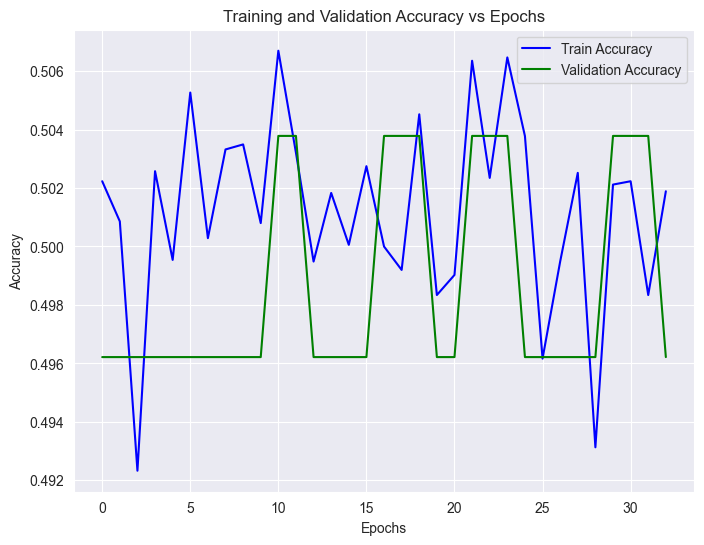

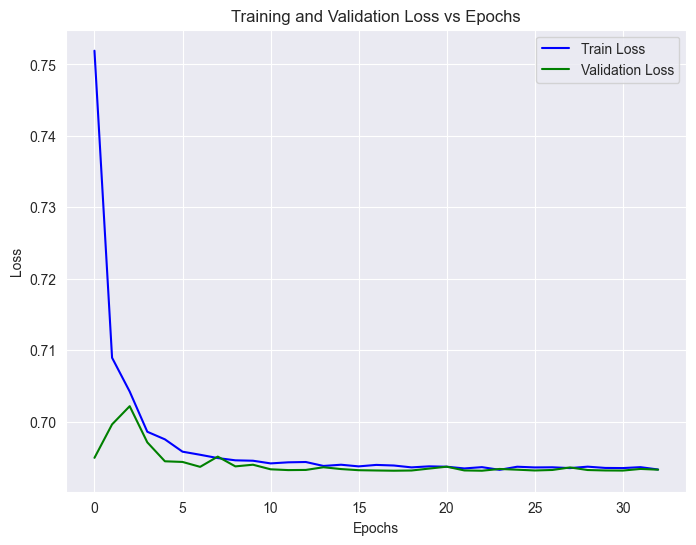

In [99]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
train_accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']
train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Train Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()
